<a href="https://colab.research.google.com/github/mominulhaque666/Group_5_CSE445_3_Spring_21/blob/main/ipynb/T20WinnerPrediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
# Import Libraries

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

import warnings
warnings.filterwarnings('ignore')

pd.set_option('display.max_columns', 50)

In [2]:
# Upload the audit risk dataset

matches = 'https://raw.githubusercontent.com/nahidosen/Group_5_CSE445_3_Spring_21/main/dataset/IT20%20.csv'

In [3]:
# Read the audit risk dataset

match_df = pd.read_csv(matches)
match_df

,dates,venue,city,home_team,team_1,team_2,total_matches_team1,total_matches_team2,toss_winner,total_wins_team1,total_wins_team2,toss_decision,umpire_1,umpire_2,match_winner,head_to_head,total_loses_team1,total_loses_team2,win_ratio_team1,win_ratio_team2,lose_ratio_team1,lose_ratio_team2
0,2005-02-17,Eden Park,Auckland,New Zealand,New Zealand,Australia,NaN,0.0,Australia,NaN,1.0,bat,BF Bowden,AL Hill,Australia,1.0,NaN,NaN,NaN,NaN,NaN,NaN
1,2005-06-13,The Rose Bowl,Southampton,England,England,Australia,NaN,1.0,England,NaN,NaN,bat,NJ Llong,JW Lloyds,England,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,2005-10-21,New Wanderers Stadium,Johannesburg,South Africa,South Africa,New Zealand,NaN,NaN,New Zealand,NaN,NaN,field,IL Howell,BG Jerling,New Zealand,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,2006-01-09,Brisbane Cricket Ground,Brisbane,Australia,Australia,South Africa,2.0,NaN,Australia,NaN,NaN,bat,BNJ Oxenford,RL Parry,Australia,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,2006-02-16,Eden Park,Auckland,New Zealand,West Indies,New Zealand,NaN,NaN,New Zealand,NaN,NaN,field,BF Bowden,AL Hill,New Zealand,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
966,2021-03-17,Sheikh Zayed Stadium,Abu Dhabi,none,Afghanistan,Zimbabwe,NaN,NaN,Zimbabwe,NaN,NaN,field,Aleem Dar,Izatullah Safi,Afghanistan,NaN,NaN,NaN,NaN,NaN,NaN,NaN
967,2021-03-18,Narendra Modi Stadium,Ahmedabad,India,India,England,NaN,NaN,England,NaN,NaN,field,KN Ananthapadmanabhan,Nitin Menon,India,NaN,NaN,NaN,NaN,NaN,NaN,NaN
968,2021-03-19,Sheikh Zayed Stadium,Abu Dhabi,none,Afghanistan,Zimbabwe,NaN,NaN,Afghanistan,NaN,NaN,bat,Ahmed Shah Durrani,Aleem Dar,Afghanistan,NaN,NaN,NaN,NaN,NaN,NaN,NaN
969,2021-03-20,Narendra Modi Stadium,Ahmedabad,India,India,England,NaN,NaN,England,NaN,NaN,field,AK Chaudhary,Nitin Menon,India,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [4]:
match_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 971 entries, 0 to 970
Data columns (total 22 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   dates                971 non-null    object 
 1   venue                971 non-null    object 
 2   city                 971 non-null    object 
 3   home_team            971 non-null    object 
 4   team_1               971 non-null    object 
 5   team_2               971 non-null    object 
 6   total_matches_team1  80 non-null     float64
 7   total_matches_team2  56 non-null     float64
 8   toss_winner          971 non-null    object 
 9   total_wins_team1     0 non-null      float64
 10  total_wins_team2     1 non-null      float64
 11  toss_decision        971 non-null    object 
 12  umpire_1             971 non-null    object 
 13  umpire_2             971 non-null    object 
 14  match_winner         971 non-null    object 
 15  head_to_head         3 non-null      flo

# EDA

In [5]:
# Check if there any column left contains missing value
match_df.isnull().sum()

dates                    0
venue                    0
city                     0
home_team                0
team_1                   0
team_2                   0
total_matches_team1    891
total_matches_team2    915
toss_winner              0
total_wins_team1       971
total_wins_team2       970
toss_decision            0
umpire_1                 0
umpire_2                 0
match_winner             0
head_to_head           968
total_loses_team1      971
total_loses_team2      971
win_ratio_team1        971
win_ratio_team2        971
lose_ratio_team1       971
lose_ratio_team2       971
dtype: int64

In [6]:
# Drop the columns which contains null value
match_df = match_df.dropna(axis=1)

In [7]:
match_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 971 entries, 0 to 970
Data columns (total 11 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   dates          971 non-null    object
 1   venue          971 non-null    object
 2   city           971 non-null    object
 3   home_team      971 non-null    object
 4   team_1         971 non-null    object
 5   team_2         971 non-null    object
 6   toss_winner    971 non-null    object
 7   toss_decision  971 non-null    object
 8   umpire_1       971 non-null    object
 9   umpire_2       971 non-null    object
 10  match_winner   971 non-null    object
dtypes: object(11)
memory usage: 83.6+ KB


In [8]:
# match_df dataframe description
match_df.describe

<bound method NDFrame.describe of           dates                    venue          city     home_team  \
0    2005-02-17                Eden Park      Auckland   New Zealand   
1    2005-06-13            The Rose Bowl   Southampton       England   
2    2005-10-21    New Wanderers Stadium  Johannesburg  South Africa   
3    2006-01-09  Brisbane Cricket Ground      Brisbane     Australia   
4    2006-02-16                Eden Park      Auckland   New Zealand   
..          ...                      ...           ...           ...   
966  2021-03-17     Sheikh Zayed Stadium     Abu Dhabi          none   
967  2021-03-18    Narendra Modi Stadium     Ahmedabad         India   
968  2021-03-19     Sheikh Zayed Stadium     Abu Dhabi          none   
969  2021-03-20    Narendra Modi Stadium     Ahmedabad         India   
970  2021-03-20     Sheikh Zayed Stadium     Abu Dhabi          none   

           team_1        team_2  toss_winner toss_decision  \
0     New Zealand     Australia    Aust

In [9]:
# View to 10 rows
match_df.head(10)

,dates,venue,city,home_team,team_1,team_2,toss_winner,toss_decision,umpire_1,umpire_2,match_winner
0,2005-02-17,Eden Park,Auckland,New Zealand,New Zealand,Australia,Australia,bat,BF Bowden,AL Hill,Australia
1,2005-06-13,The Rose Bowl,Southampton,England,England,Australia,England,bat,NJ Llong,JW Lloyds,England
2,2005-10-21,New Wanderers Stadium,Johannesburg,South Africa,South Africa,New Zealand,New Zealand,field,IL Howell,BG Jerling,New Zealand
3,2006-01-09,Brisbane Cricket Ground,Brisbane,Australia,Australia,South Africa,Australia,bat,BNJ Oxenford,RL Parry,Australia
4,2006-02-16,Eden Park,Auckland,New Zealand,West Indies,New Zealand,New Zealand,field,BF Bowden,AL Hill,New Zealand
5,2006-02-24,New Wanderers Stadium,Johannesburg,South Africa,South Africa,Australia,South Africa,bat,M Erasmus,KH Hurter,South Africa
6,2006-06-15,The Rose Bowl,Southampton,England,England,Sri Lanka,Sri Lanka,bat,IJ Gould,NJ Llong,Sri Lanka
7,2006-08-28,County Ground,Bristol,England,England,Pakistan,England,bat,PJ Hartley,NJ Llong,Pakistan
8,2006-12-01,New Wanderers Stadium,Johannesburg,South Africa,South Africa,India,South Africa,bat,IL Howell,BG Jerling,India
9,2006-12-22,Westpac Stadium,Wellington,New Zealand,New Zealand,Sri Lanka,New Zealand,bat,AL Hill,EA Watkin,Sri Lanka


In [10]:
# shape
match_df.shape

(971, 11)

In [11]:
# check all the unique values
match_df.nunique()

dates            722
venue            138
city             117
home_team         28
team_1            48
team_2            46
toss_winner       46
toss_decision      2
umpire_1         147
umpire_2         152
match_winner      42
dtype: int64

In [12]:
# total appearance of each team in team_1 column
match_df['team_1'].value_counts()

New Zealand                 81
Australia                   80
India                       77
England                     70
South Africa                69
Afghanistan                 62
Pakistan                    57
Bangladesh                  56
West Indies                 51
Sri Lanka                   51
Ireland                     43
Netherlands                 28
Zimbabwe                    28
United Arab Emirates        27
Hong Kong                   27
Canada                      19
Malaysia                    17
Kenya                       16
Nepal                       10
Oman                        10
Namibia                     10
Bermuda                     10
Scotland                     7
Singapore                    6
Papua New Guinea             5
Kuwait                       5
Denmark                      5
Thailand                     4
Guernsey                     4
Uganda                       4
Philippines                  3
Maldives                     3
Ghana   

In [13]:
# total appearance of each team in team_2 column
match_df['team_2'].value_counts()

Pakistan                    100
West Indies                  78
Sri Lanka                    77
India                        63
New Zealand                  61
England                      61
South Africa                 57
Australia                    56
Zimbabwe                     49
Ireland                      43
Scotland                     42
Netherlands                  36
Bangladesh                   35
Oman                         21
Nepal                        21
United Arab Emirates         18
Afghanistan                  16
Papua New Guinea             15
Hong Kong                    15
Kenya                        12
Vanuatu                       9
Singapore                     9
Nigeria                       7
Jersey                        7
Namibia                       6
United States of America      6
Qatar                         5
Malaysia                      5
Botswana                      5
Norway                        4
Cayman Islands                4
Maldives

In [14]:
# total appearance of each team in home_team column
match_df['home_team'].value_counts()

none                    405
New Zealand              70
South Africa             62
India                    51
England                  48
Australia                46
West Indies              43
Sri Lanka                42
Bangladesh               38
United Arab Emirates     27
Zimbabwe                 24
Pakistan                 18
Ireland                  16
Malaysia                 15
Netherlands              12
Oman                      7
Singapore                 6
Kenya                     5
Scotland                  5
Bermuda                   5
Namibia                   4
Thailand                  4
Uganda                    4
Papua New Guinea          4
Nepal                     3
Romania                   3
Hong Kong                 2
Guernsey                  2
Name: home_team, dtype: int64

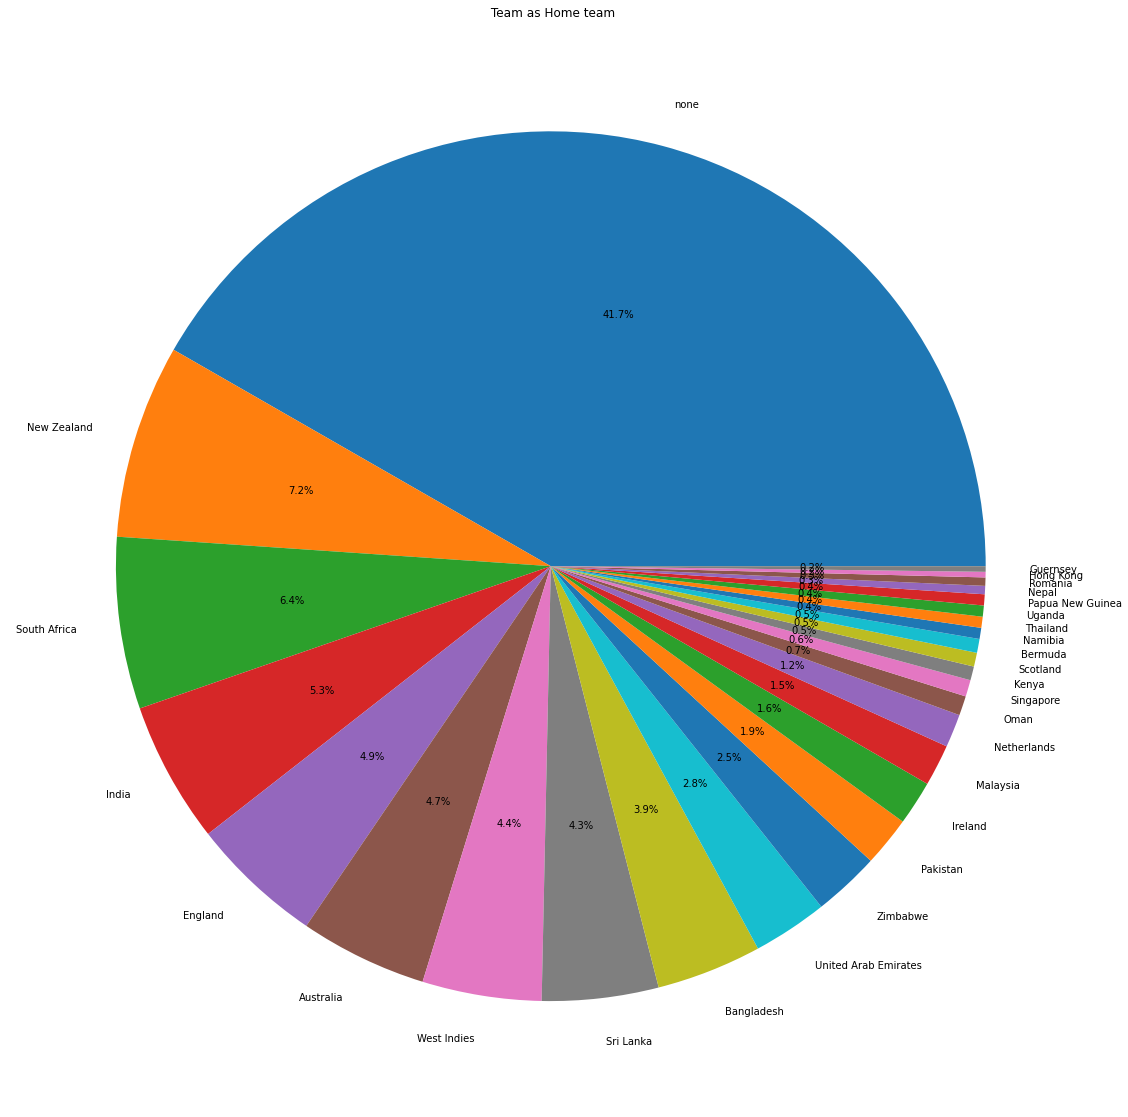

In [81]:
# plot percantage of home_team
plt.figure(figsize=(30,20))
plt.title(' Team as Home team')
plt.pie(list(match_df['home_team'].value_counts()), labels=list(match_df['home_team'].value_counts().keys()), autopct='%0.1f%%')
plt.show()

In [15]:
# teams winning the toss
match_df['toss_winner'].value_counts()

Pakistan                    79
Australia                   73
New Zealand                 69
West Indies                 67
England                     66
India                       64
South Africa                60
Sri Lanka                   58
Bangladesh                  48
Ireland                     48
Afghanistan                 39
Zimbabwe                    39
Netherlands                 33
United Arab Emirates        25
Hong Kong                   22
Scotland                    19
Oman                        18
Malaysia                    14
Kenya                       14
Nepal                       13
Papua New Guinea            11
Canada                      10
Singapore                   10
Thailand                     7
Namibia                      7
Vanuatu                      6
Bermuda                      5
Botswana                     5
Denmark                      4
Nigeria                      4
Jersey                       4
Germany                      4
United S

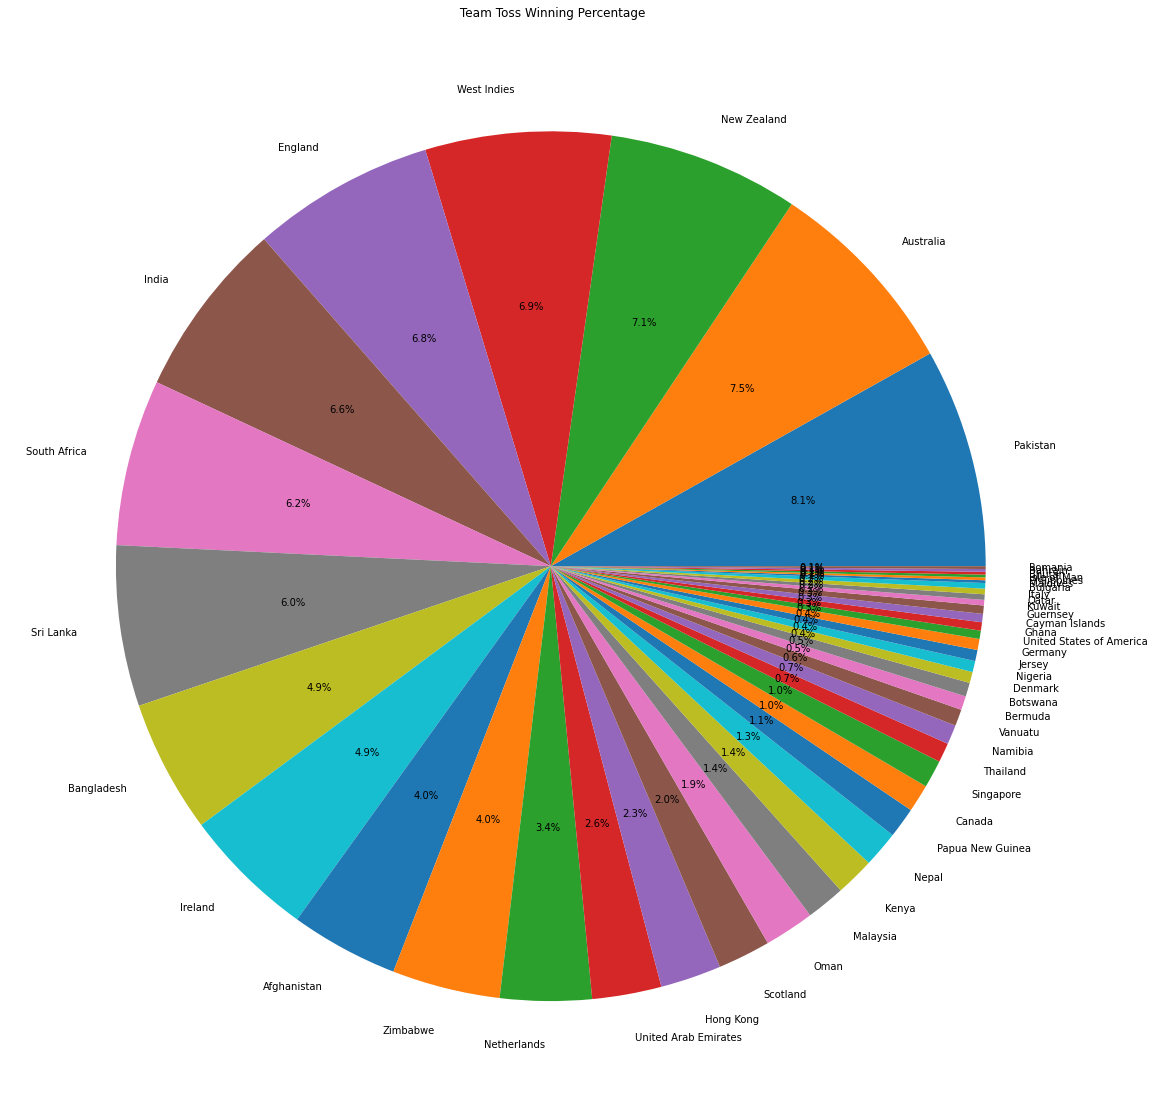

In [80]:
# team toss winning percentage
plt.figure(figsize=(30,20))
plt.title(' Team Toss Winning Percentage')
plt.pie(list(match_df['toss_winner'].value_counts()), labels=list(match_df['toss_winner'].value_counts().keys()), autopct='%0.1f%%')
plt.show()

In [16]:
# team as match winner
match_df['match_winner'].value_counts()

Pakistan                    98
India                       90
New Zealand                 77
Australia                   72
South Africa                71
England                     70
Sri Lanka                   59
West Indies                 58
Afghanistan                 54
Ireland                     39
Netherlands                 36
Bangladesh                  30
Scotland                    23
United Arab Emirates        21
Zimbabwe                    17
Nepal                       16
Hong Kong                   15
Oman                        14
Papua New Guinea            13
Malaysia                    12
Namibia                     12
Kenya                       11
Singapore                    9
Canada                       8
Jersey                       6
Bermuda                      5
Guernsey                     4
Vanuatu                      4
Germany                      4
Kuwait                       3
Uganda                       2
Maldives                     2
Romania 

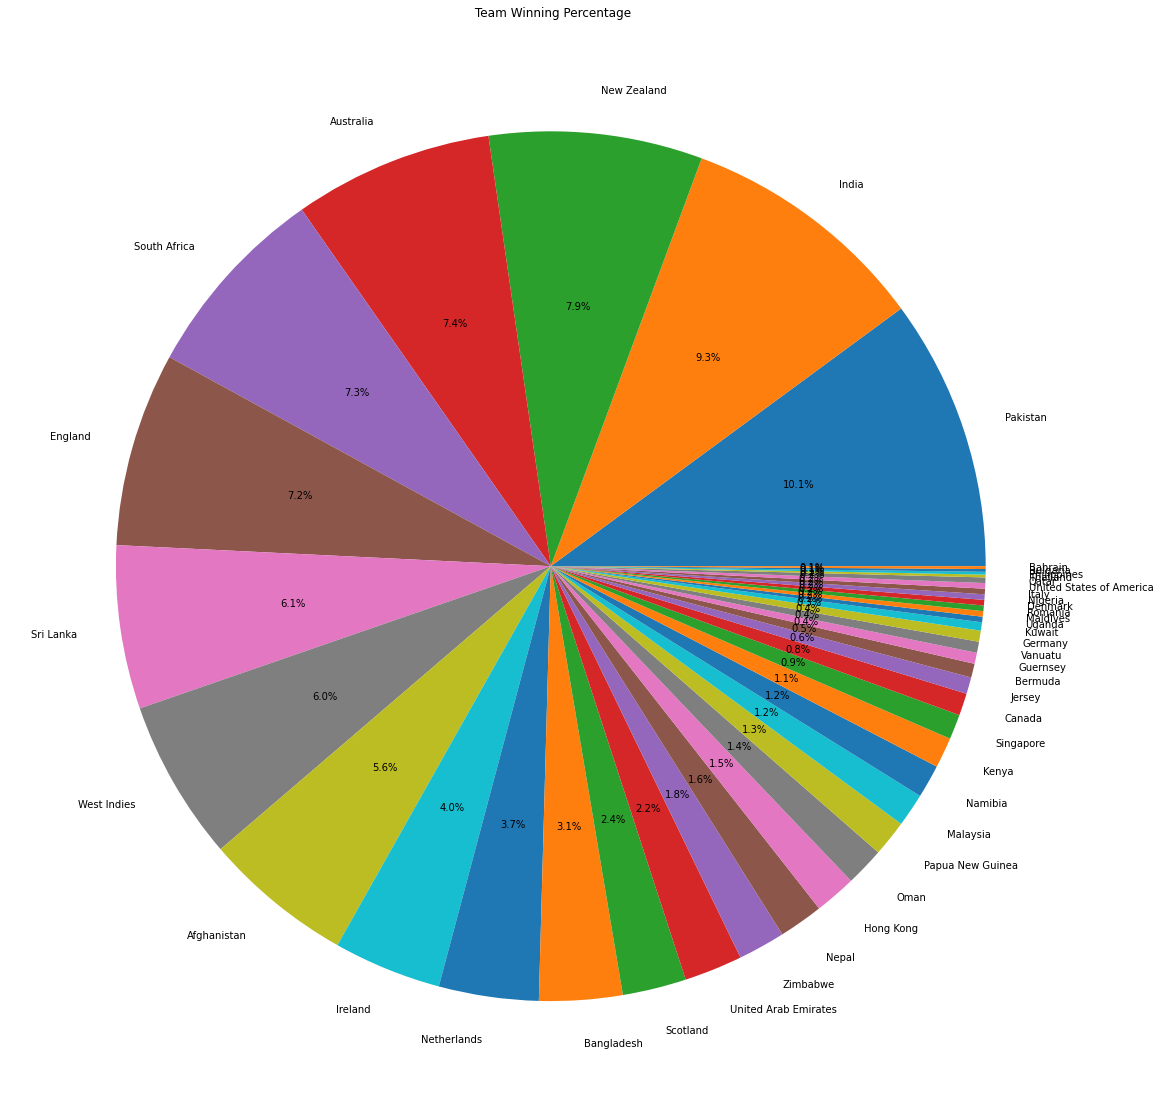

In [79]:
# each team match winning percentage
plt.figure(figsize=(30,20))
plt.title(' Team Winning Percentage')
plt.pie(list(match_df['match_winner'].value_counts()), labels=list(match_df['match_winner'].value_counts().keys()), autopct='%0.1f%%')
plt.show()

In [17]:
toss_wins = match_df['toss_winner'].value_counts(sort=True).sort_index()
match_wins = match_df['match_winner'].value_counts(sort=True).sort_index()

Text(0.5, 1.0, 'Match Winners')

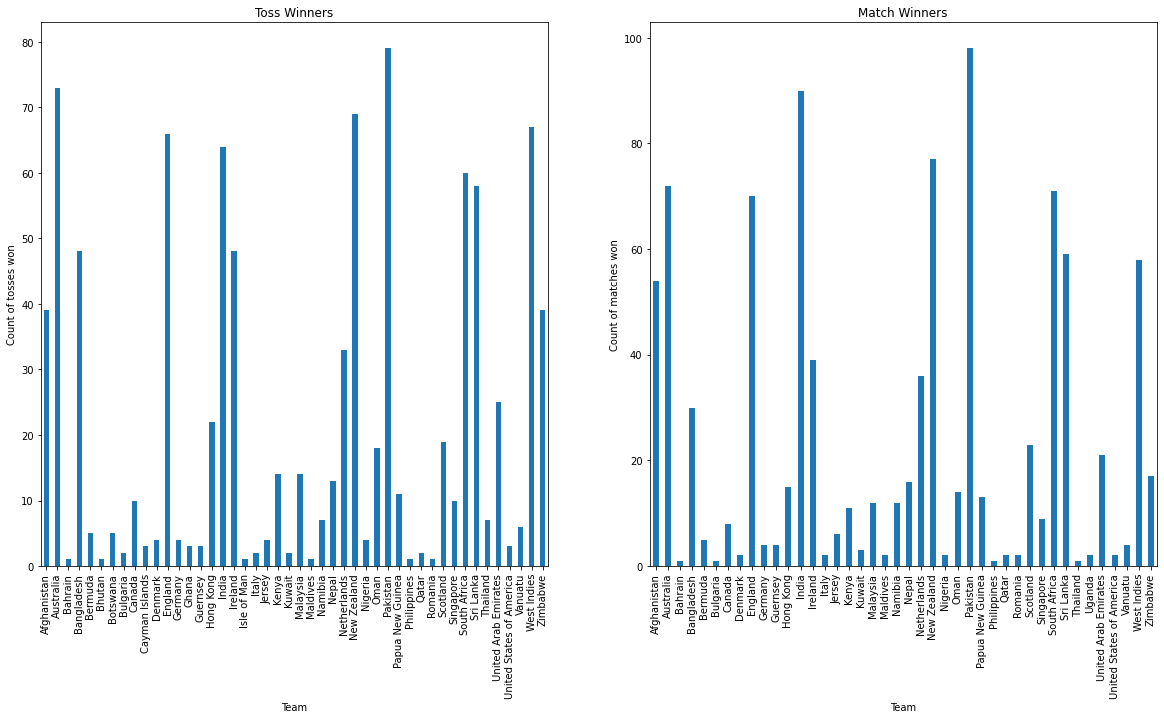

In [18]:
# Now plot toss & match winner together

fig = plt.figure(figsize=(20,10))

ax1 = fig.add_subplot(121)
ax1.set_xlabel('Team')
ax1.set_ylabel('Count of tosses won')
ax1.set_title("Toss Winners")
toss_wins.plot(kind='bar')

ax2 = fig.add_subplot(122)
match_wins.plot(kind='bar')
ax2.set_xlabel('Team')
ax2.set_ylabel('Count of matches won')
ax2.set_title("Match Winners")

In [19]:
home_team = match_df['home_team'].value_counts(sort=True).sort_index()
match_wins = match_df['match_winner'].value_counts(sort=True).sort_index()

Text(0.5, 1.0, 'Match Winners')

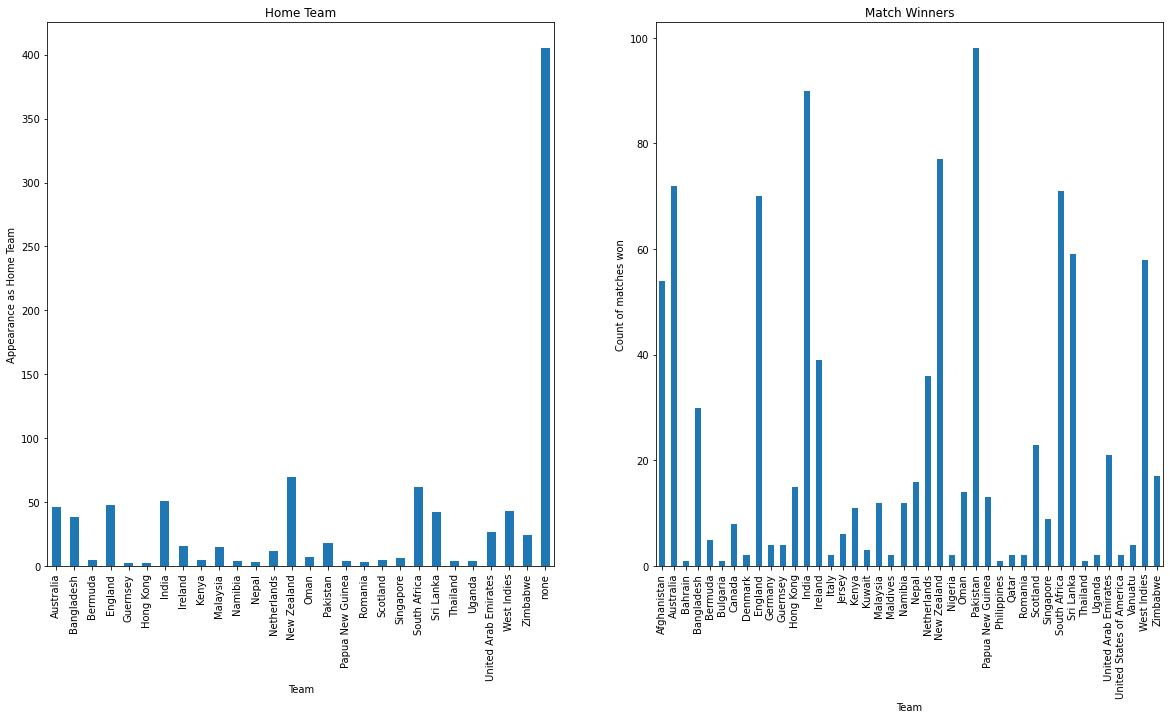

In [20]:
# Now plot home team & match winner together

fig = plt.figure(figsize=(20,10))

ax1 = fig.add_subplot(121)
ax1.set_xlabel('Team')
ax1.set_ylabel('Appearance as Home Team')
ax1.set_title("Home Team")
home_team.plot(kind='bar')

ax2 = fig.add_subplot(122)
match_wins.plot(kind='bar')
ax2.set_xlabel('Team')
ax2.set_ylabel('Count of matches won')
ax2.set_title("Match Winners")

In [21]:
# teams batting first
batting_first = match_df[match_df['toss_decision'] == 'bat']

In [22]:
batting_first.head(10)

,dates,venue,city,home_team,team_1,team_2,toss_winner,toss_decision,umpire_1,umpire_2,match_winner
0,2005-02-17,Eden Park,Auckland,New Zealand,New Zealand,Australia,Australia,bat,BF Bowden,AL Hill,Australia
1,2005-06-13,The Rose Bowl,Southampton,England,England,Australia,England,bat,NJ Llong,JW Lloyds,England
3,2006-01-09,Brisbane Cricket Ground,Brisbane,Australia,Australia,South Africa,Australia,bat,BNJ Oxenford,RL Parry,Australia
5,2006-02-24,New Wanderers Stadium,Johannesburg,South Africa,South Africa,Australia,South Africa,bat,M Erasmus,KH Hurter,South Africa
6,2006-06-15,The Rose Bowl,Southampton,England,England,Sri Lanka,Sri Lanka,bat,IJ Gould,NJ Llong,Sri Lanka
7,2006-08-28,County Ground,Bristol,England,England,Pakistan,England,bat,PJ Hartley,NJ Llong,Pakistan
8,2006-12-01,New Wanderers Stadium,Johannesburg,South Africa,South Africa,India,South Africa,bat,IL Howell,BG Jerling,India
9,2006-12-22,Westpac Stadium,Wellington,New Zealand,New Zealand,Sri Lanka,New Zealand,bat,AL Hill,EA Watkin,Sri Lanka
11,2007-01-09,Sydney Cricket Ground,Sydney,Australia,Australia,England,Australia,bat,PD Parker,RL Parry,Australia
12,2007-06-28,Kennington Oval,London,England,England,West Indies,West Indies,bat,PJ Hartley,NJ Llong,West Indies


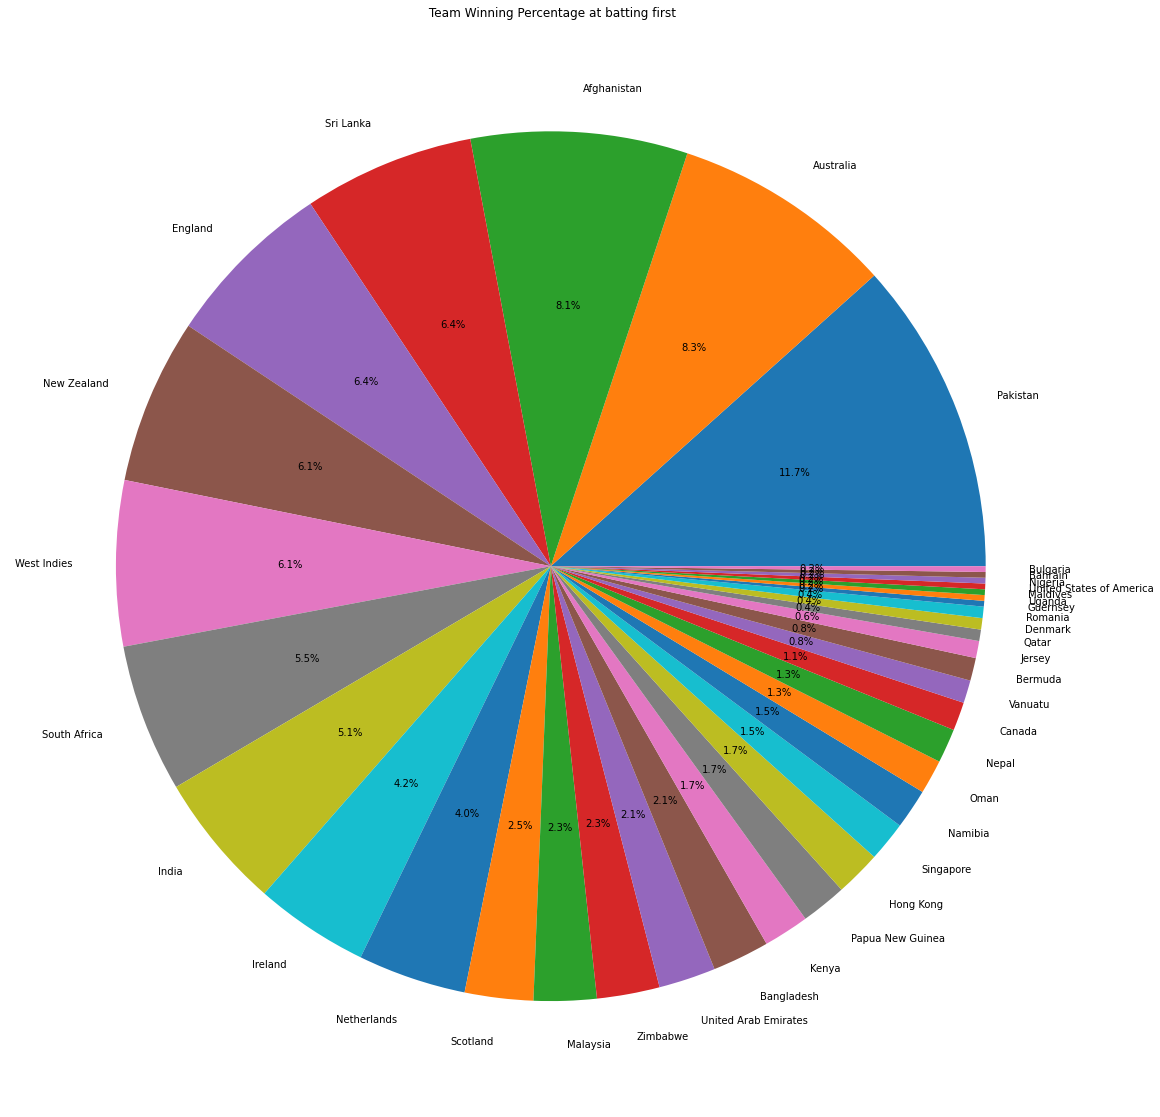

In [83]:
# teams winning percentage while batting first
plt.figure(figsize=(30,20))
plt.title(' Team Winning Percentage at batting first')
plt.pie(list(batting_first['match_winner'].value_counts()), labels=list(batting_first['match_winner'].value_counts().keys()), autopct='%0.1f%%')
plt.show()

In [23]:
bat_first = batting_first['toss_winner'].value_counts(sort=True).sort_index()
match_wins = batting_first['match_winner'].value_counts(sort=True).sort_index()

Text(0.5, 1.0, 'Match Winners')

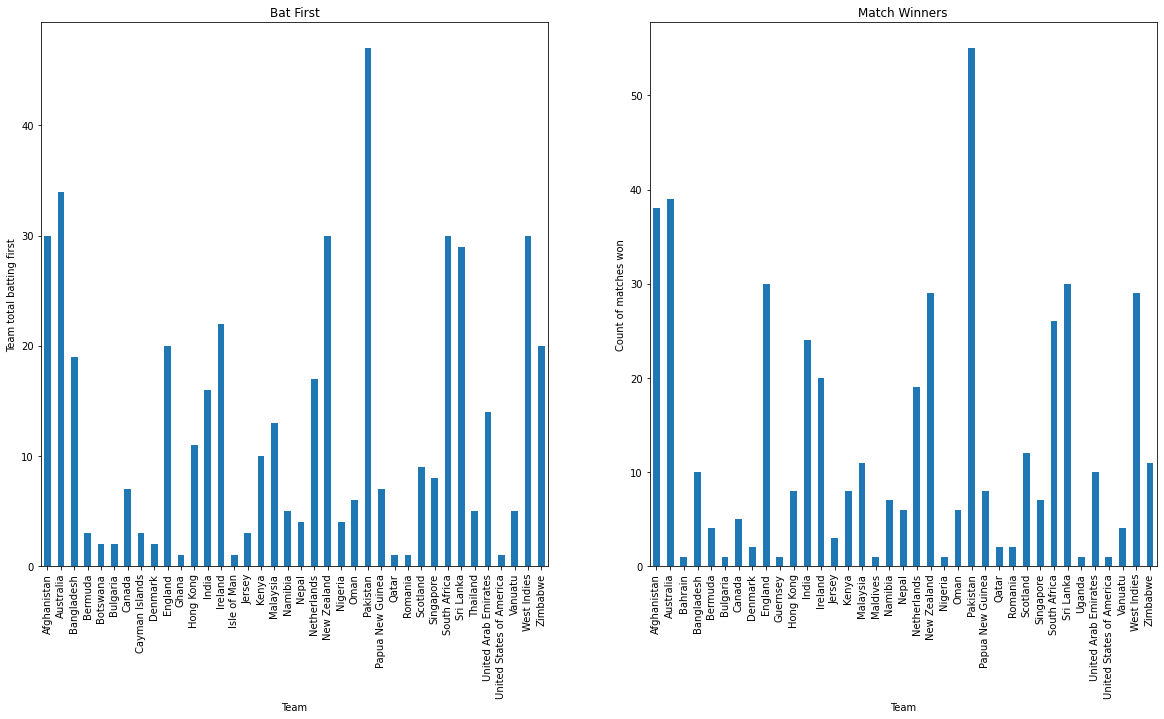

In [24]:
# plot batting first & match winning
fig = plt.figure(figsize=(20,10))

ax1 = fig.add_subplot(121)
ax1.set_xlabel('Team')
ax1.set_ylabel('Team total batting first')
ax1.set_title("Bat First")
bat_first.plot(kind='bar')

ax2 = fig.add_subplot(122)
match_wins.plot(kind='bar')
ax2.set_xlabel('Team')
ax2.set_ylabel('Count of matches won')
ax2.set_title("Match Winners")

In [25]:
# team bowling first
bowling_first = match_df[match_df['toss_decision'] == 'field']

In [26]:
bowling_first.head(10)

,dates,venue,city,home_team,team_1,team_2,toss_winner,toss_decision,umpire_1,umpire_2,match_winner
2,2005-10-21,New Wanderers Stadium,Johannesburg,South Africa,South Africa,New Zealand,New Zealand,field,IL Howell,BG Jerling,New Zealand
4,2006-02-16,Eden Park,Auckland,New Zealand,West Indies,New Zealand,New Zealand,field,BF Bowden,AL Hill,New Zealand
10,2006-12-26,Eden Park,Auckland,New Zealand,New Zealand,Sri Lanka,New Zealand,field,BF Bowden,AL Hill,New Zealand
14,2007-09-01,Gymkhana Club Ground,Nairobi,Kenya,Kenya,Bangladesh,Bangladesh,field,R DMello,SR Modi,Bangladesh
15,2007-09-02,Gymkhana Club Ground,Nairobi,none,Bangladesh,Pakistan,Bangladesh,field,R DMello,SR Modi,Pakistan
17,2007-09-11,New Wanderers Stadium,Johannesburg,South Africa,South Africa,West Indies,South Africa,field,MR Benson,DJ Harper,South Africa
18,2007-09-12,Kingsmead,Durban,none,Kenya,New Zealand,New Zealand,field,BR Doctrove,SJA Taufel,New Zealand
19,2007-09-12,Kingsmead,Durban,none,Pakistan,Scotland,Scotland,field,SJ Davis,SJA Taufel,Pakistan
21,2007-09-13,New Wanderers Stadium,Johannesburg,none,Bangladesh,West Indies,Bangladesh,field,MR Benson,NJ Llong,Bangladesh
23,2007-09-14,Kingsmead,Durban,none,Pakistan,India,India,field,BR Doctrove,SJA Taufel,Pakistan


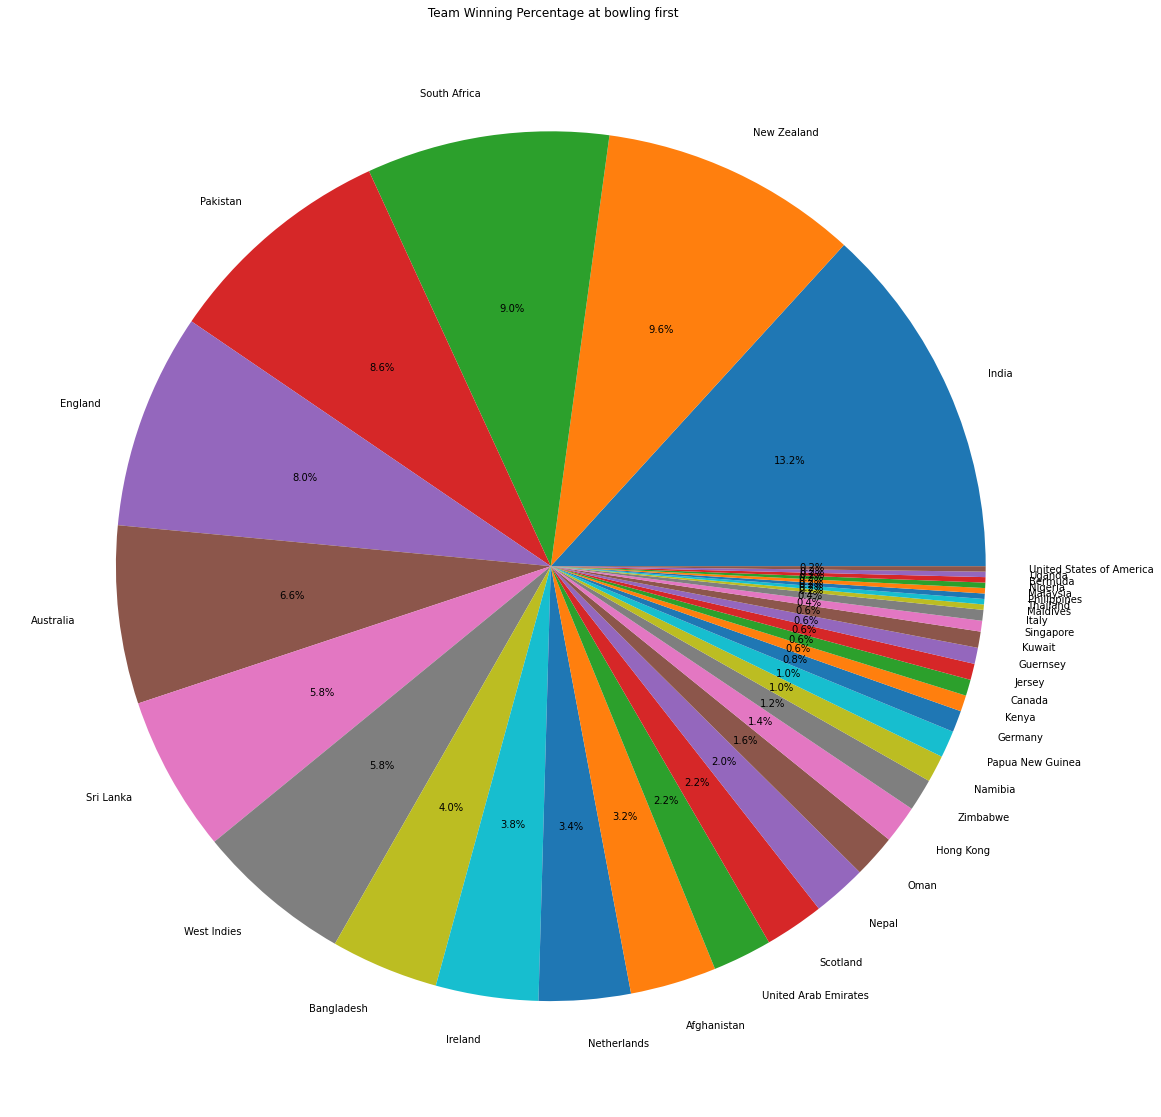

In [84]:
# teams winning while bowling first percentage
plt.figure(figsize=(30,20))
plt.title(' Team Winning Percentage at bowling first')
plt.pie(list(bowling_first['match_winner'].value_counts()), labels=list(bowling_first['match_winner'].value_counts().keys()), autopct='%0.1f%%')
plt.show()

In [27]:
bowl_first = bowling_first['toss_winner'].value_counts(sort=True).sort_index()
match_wins = bowling_first['match_winner'].value_counts(sort=True).sort_index()

Text(0.5, 1.0, 'Match Winners')

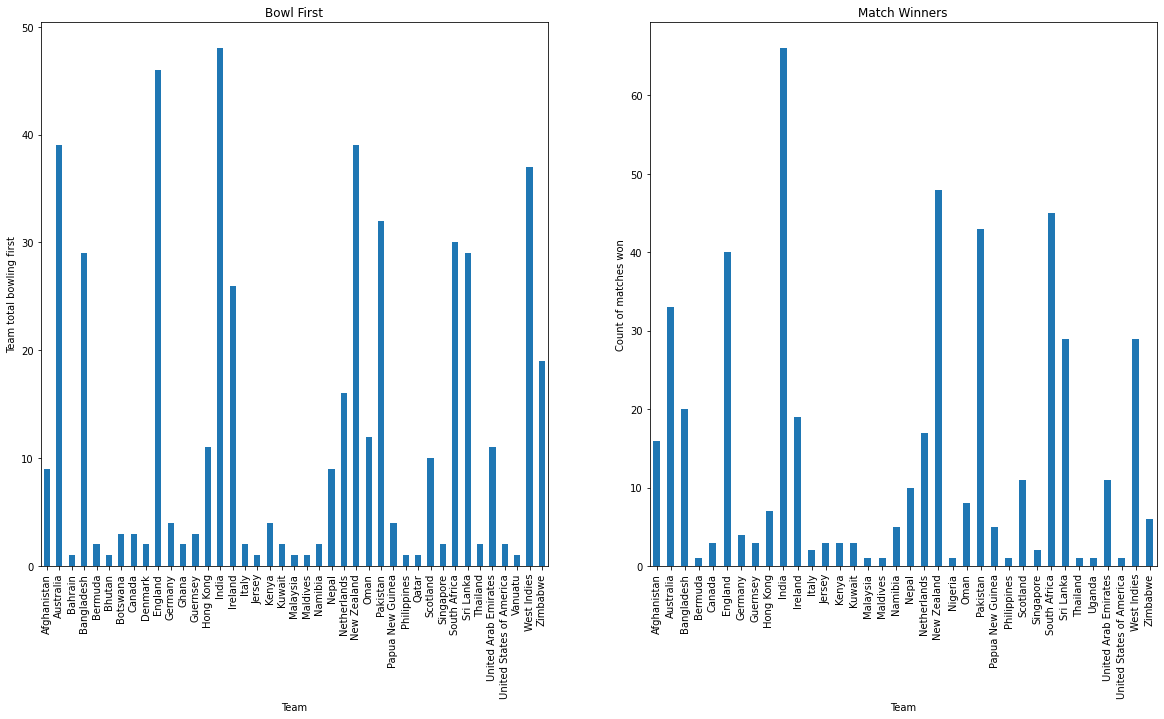

In [28]:
# plot match win and bowl first
fig = plt.figure(figsize=(20,10))

ax1 = fig.add_subplot(121)
ax1.set_xlabel('Team')
ax1.set_ylabel('Team total bowling first')
ax1.set_title("Bowl First")
bowl_first.plot(kind='bar')

ax2 = fig.add_subplot(122)
match_wins.plot(kind='bar')
ax2.set_xlabel('Team')
ax2.set_ylabel('Count of matches won')
ax2.set_title("Match Winners")

In [29]:
# total win for each team batting first
batting_first['match_winner'].value_counts().sort_index()

Afghanistan                 38
Australia                   39
Bahrain                      1
Bangladesh                  10
Bermuda                      4
Bulgaria                     1
Canada                       5
Denmark                      2
England                     30
Guernsey                     1
Hong Kong                    8
India                       24
Ireland                     20
Jersey                       3
Kenya                        8
Malaysia                    11
Maldives                     1
Namibia                      7
Nepal                        6
Netherlands                 19
New Zealand                 29
Nigeria                      1
Oman                         6
Pakistan                    55
Papua New Guinea             8
Qatar                        2
Romania                      2
Scotland                    12
Singapore                    7
South Africa                26
Sri Lanka                   30
Uganda                       1
United A

In [30]:
# total win for each team bowling first
bowling_first['match_winner'].value_counts().sort_index()

Afghanistan                 16
Australia                   33
Bangladesh                  20
Bermuda                      1
Canada                       3
England                     40
Germany                      4
Guernsey                     3
Hong Kong                    7
India                       66
Ireland                     19
Italy                        2
Jersey                       3
Kenya                        3
Kuwait                       3
Malaysia                     1
Maldives                     1
Namibia                      5
Nepal                       10
Netherlands                 17
New Zealand                 48
Nigeria                      1
Oman                         8
Pakistan                    43
Papua New Guinea             5
Philippines                  1
Scotland                    11
Singapore                    2
South Africa                45
Sri Lanka                   29
Thailand                     1
Uganda                       1
United A

In [31]:
# team 1 as home team
home_team_one = match_df[match_df['home_team'] == match_df['team_1']]

In [32]:
home_team_one.head(10)

,dates,venue,city,home_team,team_1,team_2,toss_winner,toss_decision,umpire_1,umpire_2,match_winner
0,2005-02-17,Eden Park,Auckland,New Zealand,New Zealand,Australia,Australia,bat,BF Bowden,AL Hill,Australia
1,2005-06-13,The Rose Bowl,Southampton,England,England,Australia,England,bat,NJ Llong,JW Lloyds,England
2,2005-10-21,New Wanderers Stadium,Johannesburg,South Africa,South Africa,New Zealand,New Zealand,field,IL Howell,BG Jerling,New Zealand
3,2006-01-09,Brisbane Cricket Ground,Brisbane,Australia,Australia,South Africa,Australia,bat,BNJ Oxenford,RL Parry,Australia
5,2006-02-24,New Wanderers Stadium,Johannesburg,South Africa,South Africa,Australia,South Africa,bat,M Erasmus,KH Hurter,South Africa
6,2006-06-15,The Rose Bowl,Southampton,England,England,Sri Lanka,Sri Lanka,bat,IJ Gould,NJ Llong,Sri Lanka
7,2006-08-28,County Ground,Bristol,England,England,Pakistan,England,bat,PJ Hartley,NJ Llong,Pakistan
8,2006-12-01,New Wanderers Stadium,Johannesburg,South Africa,South Africa,India,South Africa,bat,IL Howell,BG Jerling,India
9,2006-12-22,Westpac Stadium,Wellington,New Zealand,New Zealand,Sri Lanka,New Zealand,bat,AL Hill,EA Watkin,Sri Lanka
10,2006-12-26,Eden Park,Auckland,New Zealand,New Zealand,Sri Lanka,New Zealand,field,BF Bowden,AL Hill,New Zealand


In [33]:
home_team_one.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 483 entries, 0 to 969
Data columns (total 11 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   dates          483 non-null    object
 1   venue          483 non-null    object
 2   city           483 non-null    object
 3   home_team      483 non-null    object
 4   team_1         483 non-null    object
 5   team_2         483 non-null    object
 6   toss_winner    483 non-null    object
 7   toss_decision  483 non-null    object
 8   umpire_1       483 non-null    object
 9   umpire_2       483 non-null    object
 10  match_winner   483 non-null    object
dtypes: object(11)
memory usage: 45.3+ KB


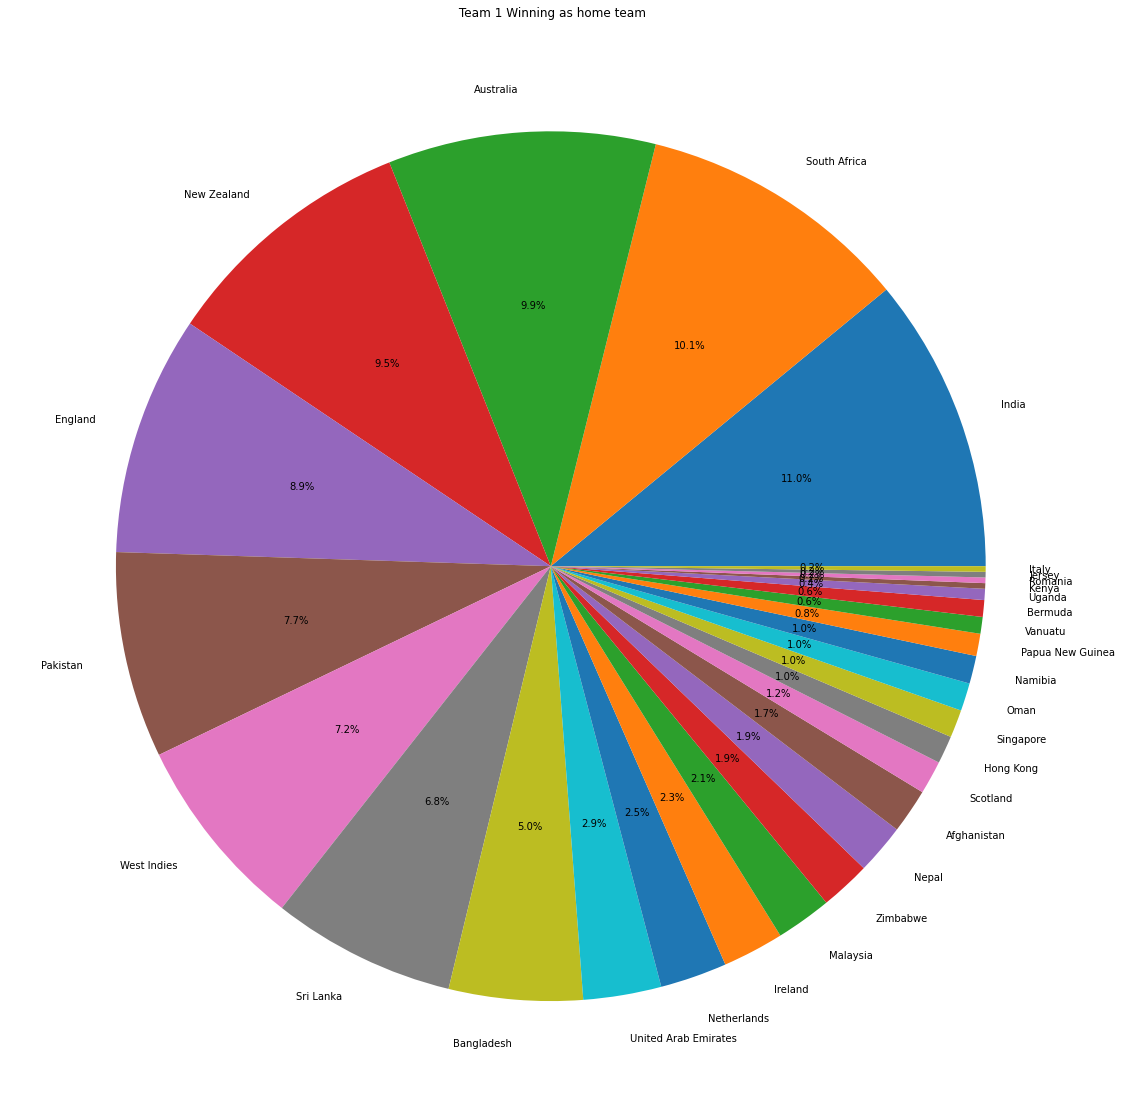

In [85]:
# team 1 winning percentage as home team
plt.figure(figsize=(30,20))
plt.title(' Team 1 Winning as home team')
plt.pie(list(home_team_one['match_winner'].value_counts()), labels=list(home_team_one['match_winner'].value_counts().keys()), autopct='%0.1f%%')
plt.show()

In [34]:
# total win as home team
home_team_one['match_winner'].value_counts().sort_index()

Afghanistan              8
Australia               48
Bangladesh              24
Bermuda                  3
England                 43
Hong Kong                5
India                   53
Ireland                 11
Italy                    1
Jersey                   1
Kenya                    1
Malaysia                10
Namibia                  5
Nepal                    9
Netherlands             12
New Zealand             46
Oman                     5
Pakistan                37
Papua New Guinea         4
Romania                  1
Scotland                 6
Singapore                5
South Africa            49
Sri Lanka               33
Uganda                   2
United Arab Emirates    14
Vanuatu                  3
West Indies             35
Zimbabwe                 9
Name: match_winner, dtype: int64

In [35]:
home_team_onee = home_team_one['team_1'].value_counts(sort=True).sort_index()
match_wins = bowling_first['match_winner'].value_counts(sort=True).sort_index()

Text(0.5, 1.0, 'Match Winners')

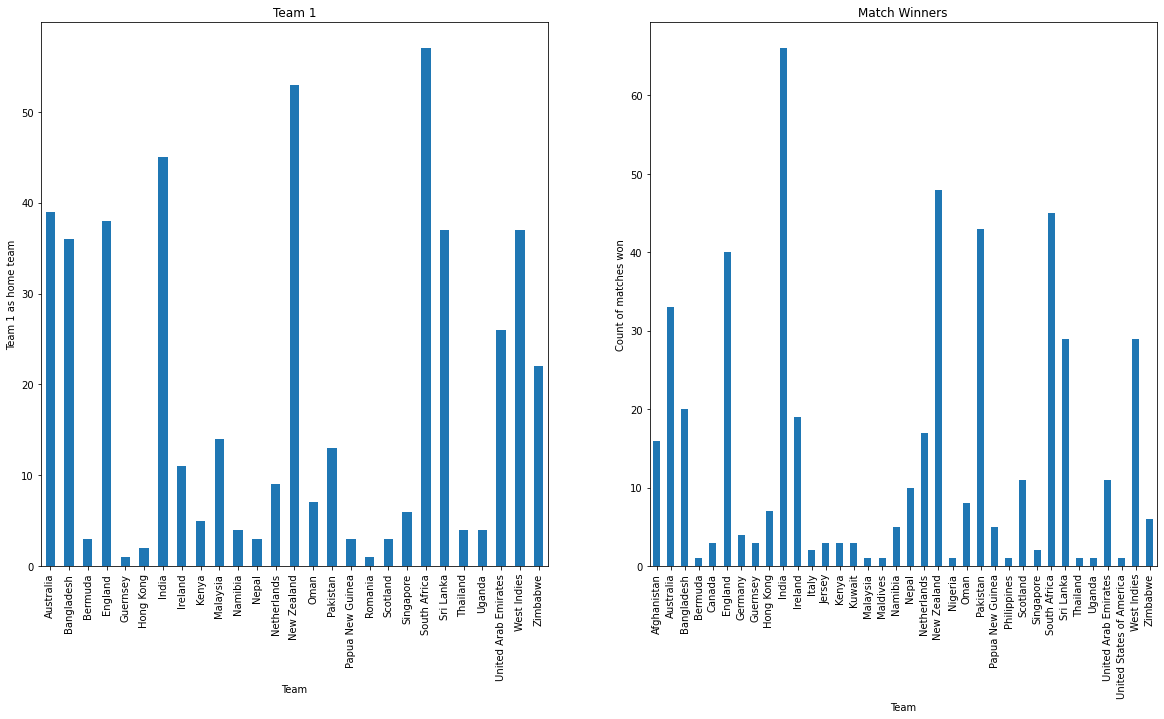

In [36]:
# plot match win and as home team for team 1
fig = plt.figure(figsize=(20,10))

ax1 = fig.add_subplot(121)
ax1.set_xlabel('Team')
ax1.set_ylabel('Team 1 as home team')
ax1.set_title("Team 1")
home_team_onee.plot(kind='bar')

ax2 = fig.add_subplot(122)
match_wins.plot(kind='bar')
ax2.set_xlabel('Team')
ax2.set_ylabel('Count of matches won')
ax2.set_title("Match Winners")

In [37]:
# team 2 as home team
home_team_two = match_df[match_df['home_team'] == match_df['team_2']]

In [38]:
home_team_two.head(10)

,dates,venue,city,home_team,team_1,team_2,toss_winner,toss_decision,umpire_1,umpire_2,match_winner
4,2006-02-16,Eden Park,Auckland,New Zealand,West Indies,New Zealand,New Zealand,field,BF Bowden,AL Hill,New Zealand
60,2008-12-26,Eden Park,Auckland,New Zealand,West Indies,New Zealand,New Zealand,bat,BF Bowden,AL Hill,New Zealand
101,2009-08-30,Old Trafford,Manchester,England,Australia,England,England,field,IJ Gould,RA Kettleborough,England
124,2010-02-28,AMI Stadium,Christchurch,New Zealand,Australia,New Zealand,New Zealand,bat,CB Gaffaney,AL Hill,New Zealand
230,2012-09-10,Old Trafford,Manchester,England,South Africa,England,England,field,RJ Bailey,RK Illingworth,England
245,2012-09-27,Pallekele International Cricket Stadium,Kandy,Sri Lanka,New Zealand,Sri Lanka,Sri Lanka,bat,Aleem Dar,SJA Taufel,New Zealand
260,2012-10-30,Pallekele International Cricket Stadium,Kandy,Sri Lanka,New Zealand,Sri Lanka,Sri Lanka,field,REJ Martinesz,RSA Palliyaguruge,Sri Lanka
290,2013-06-27,Kennington Oval,London,England,New Zealand,England,England,field,RK Illingworth,RT Robinson,New Zealand
372,2014-08-27,Warner Park,St Kitts,West Indies,Bangladesh,West Indies,West Indies,bat,PJ Nero,JS Wilson,Bangladesh
399,2015-07-13,Civil Service Cricket Club,Belfast,Ireland,Nepal,Ireland,Ireland,field,AK Chaudhary,JD Cloete,Ireland


In [39]:
home_team_two.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 83 entries, 4 to 964
Data columns (total 11 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   dates          83 non-null     object
 1   venue          83 non-null     object
 2   city           83 non-null     object
 3   home_team      83 non-null     object
 4   team_1         83 non-null     object
 5   team_2         83 non-null     object
 6   toss_winner    83 non-null     object
 7   toss_decision  83 non-null     object
 8   umpire_1       83 non-null     object
 9   umpire_2       83 non-null     object
 10  match_winner   83 non-null     object
dtypes: object(11)
memory usage: 7.8+ KB


In [40]:
# team 2 wins as home team
home_team_two['match_winner'].value_counts().sort_index()

Afghanistan              2
Australia                7
Bangladesh               1
Bermuda                  2
Bulgaria                 1
England                  8
Guernsey                 1
India                   12
Ireland                  1
Malaysia                 1
Netherlands              2
New Zealand             13
Pakistan                12
Papua New Guinea         1
Romania                  1
Scotland                 1
South Africa             5
Sri Lanka                5
United Arab Emirates     1
West Indies              6
Name: match_winner, dtype: int64

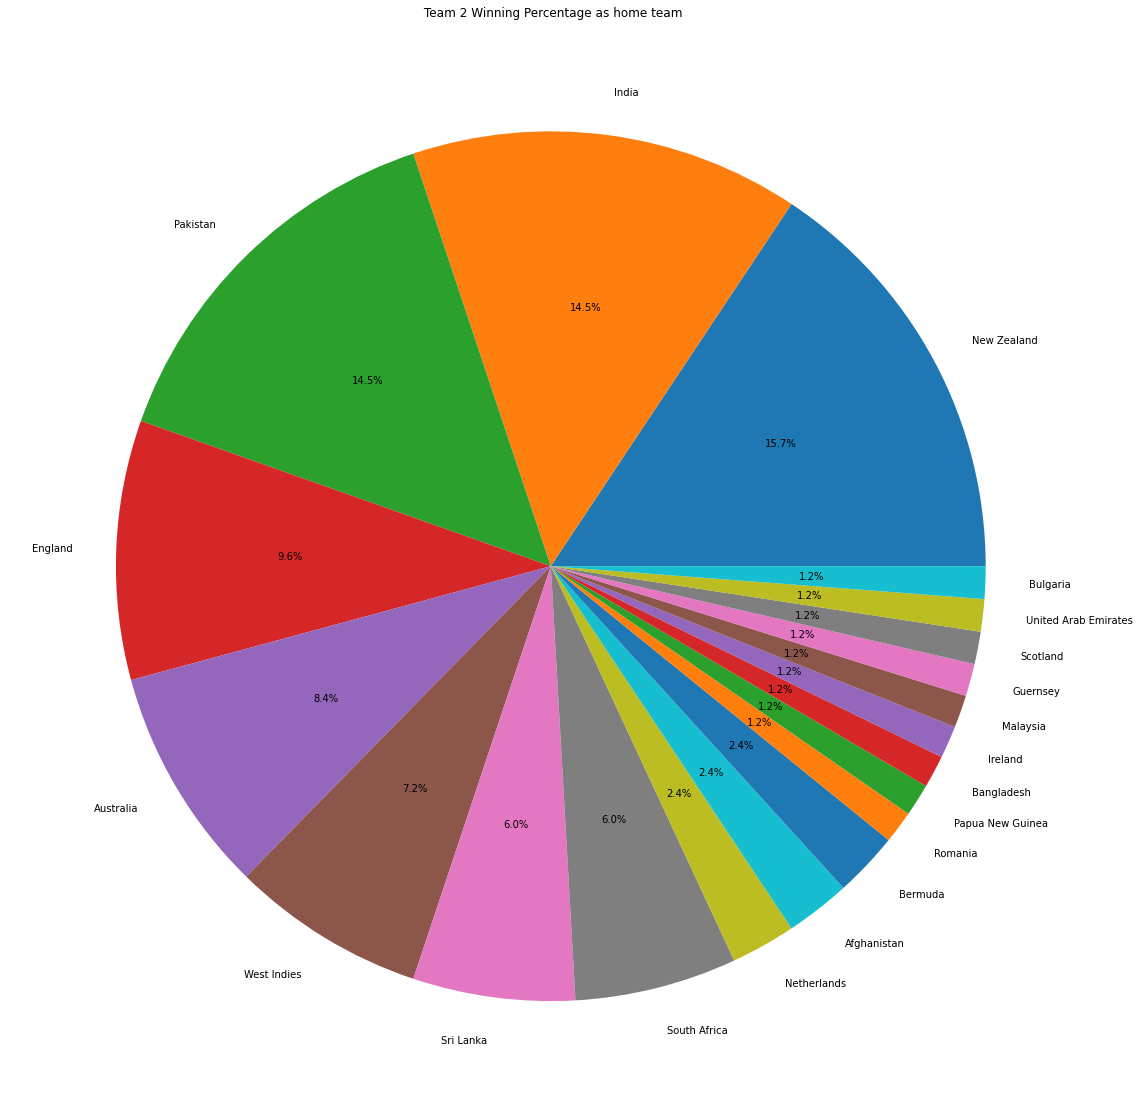

In [86]:
# team 2 winning percentage as home team
plt.figure(figsize=(30,20))
plt.title(' Team 2 Winning Percentage as home team')
plt.pie(list(home_team_two['match_winner'].value_counts()), labels=list(home_team_two['match_winner'].value_counts().keys()), autopct='%0.1f%%')
plt.show()

In [41]:
home_team_twoo = home_team_two['team_2'].value_counts(sort=True).sort_index()
match_wins = bowling_first['match_winner'].value_counts(sort=True).sort_index()

Text(0.5, 1.0, 'Match Winners')

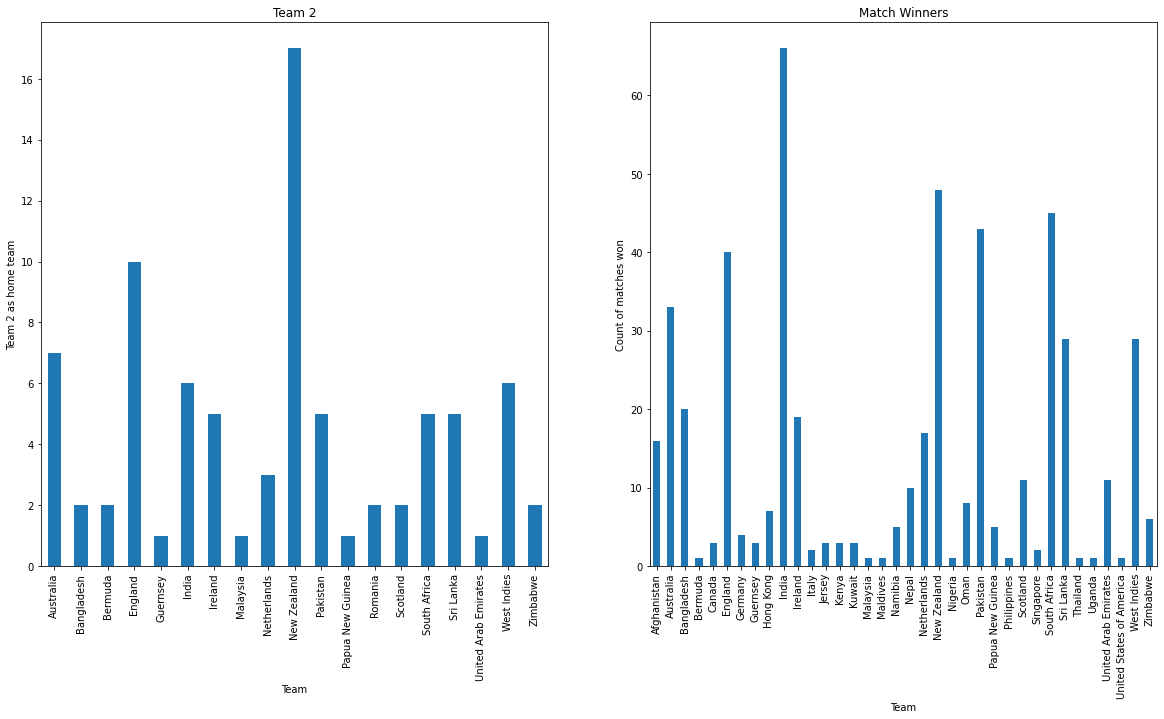

In [42]:
# plot match wins as home team for team 2
fig = plt.figure(figsize=(20,10))

ax1 = fig.add_subplot(121)
ax1.set_xlabel('Team')
ax1.set_ylabel('Team 2 as home team')
ax1.set_title("Team 2")
home_team_twoo.plot(kind='bar')

ax2 = fig.add_subplot(122)
match_wins.plot(kind='bar')
ax2.set_xlabel('Team')
ax2.set_ylabel('Count of matches won')
ax2.set_title("Match Winners")

In [45]:
# team 1 in cities and venues
venue_vs_team_one = match_df[match_df['team_1'] == match_df['match_winner']]

In [46]:
venue_vs_team_one.head(10)

,dates,venue,city,home_team,team_1,team_2,toss_winner,toss_decision,umpire_1,umpire_2,match_winner
1,2005-06-13,The Rose Bowl,Southampton,England,England,Australia,England,bat,NJ Llong,JW Lloyds,England
3,2006-01-09,Brisbane Cricket Ground,Brisbane,Australia,Australia,South Africa,Australia,bat,BNJ Oxenford,RL Parry,Australia
5,2006-02-24,New Wanderers Stadium,Johannesburg,South Africa,South Africa,Australia,South Africa,bat,M Erasmus,KH Hurter,South Africa
10,2006-12-26,Eden Park,Auckland,New Zealand,New Zealand,Sri Lanka,New Zealand,field,BF Bowden,AL Hill,New Zealand
11,2007-01-09,Sydney Cricket Ground,Sydney,Australia,Australia,England,Australia,bat,PD Parker,RL Parry,Australia
13,2007-06-29,Kennington Oval,London,England,England,West Indies,West Indies,bat,IJ Gould,NJ Llong,England
17,2007-09-11,New Wanderers Stadium,Johannesburg,South Africa,South Africa,West Indies,South Africa,field,MR Benson,DJ Harper,South Africa
19,2007-09-12,Kingsmead,Durban,none,Pakistan,Scotland,Scotland,field,SJ Davis,SJA Taufel,Pakistan
21,2007-09-13,New Wanderers Stadium,Johannesburg,none,Bangladesh,West Indies,Bangladesh,field,MR Benson,NJ Llong,Bangladesh
22,2007-09-13,Newlands,Cape Town,none,England,Zimbabwe,England,bat,Asad Rauf,AL Hill,England


In [52]:
#team 1 and venue relationship 
team_one_venue = venue_vs_team_one.groupby('team_1')['venue'].sum()
team_one_venue.sort_values(axis=0, ascending=False, inplace=True)

In [49]:
team_one_venue

team_1
Bermuda                  White Hill FieldWhite Hill FieldWhite Hill Field
Kenya                   Wanderers Cricket GroundWanderers Cricket Grou...
Namibia                 United Cricket Club GroundUnited Cricket Club ...
Sri Lanka               Trent BridgeKennington OvalProvidence StadiumP...
England                 The Rose BowlKennington OvalNewlandsOld Traffo...
United Arab Emirates    Sheikh Zayed StadiumICC AcademySheikh Zayed St...
Zimbabwe                Queens Sports ClubHarare Sports ClubHarare Spo...
Hong Kong               P Sara OvalCivil Service Cricket ClubSheikh Za...
Bangladesh              New Wanderers StadiumShere Bangla National Sta...
South Africa            New Wanderers StadiumNew Wanderers StadiumNewl...
India                   New Wanderers StadiumBrabourne StadiumTrent Br...
Romania                                      Moara Vlasiei Cricket Ground
Bulgaria                                     Moara Vlasiei Cricket Ground
Uganda                         

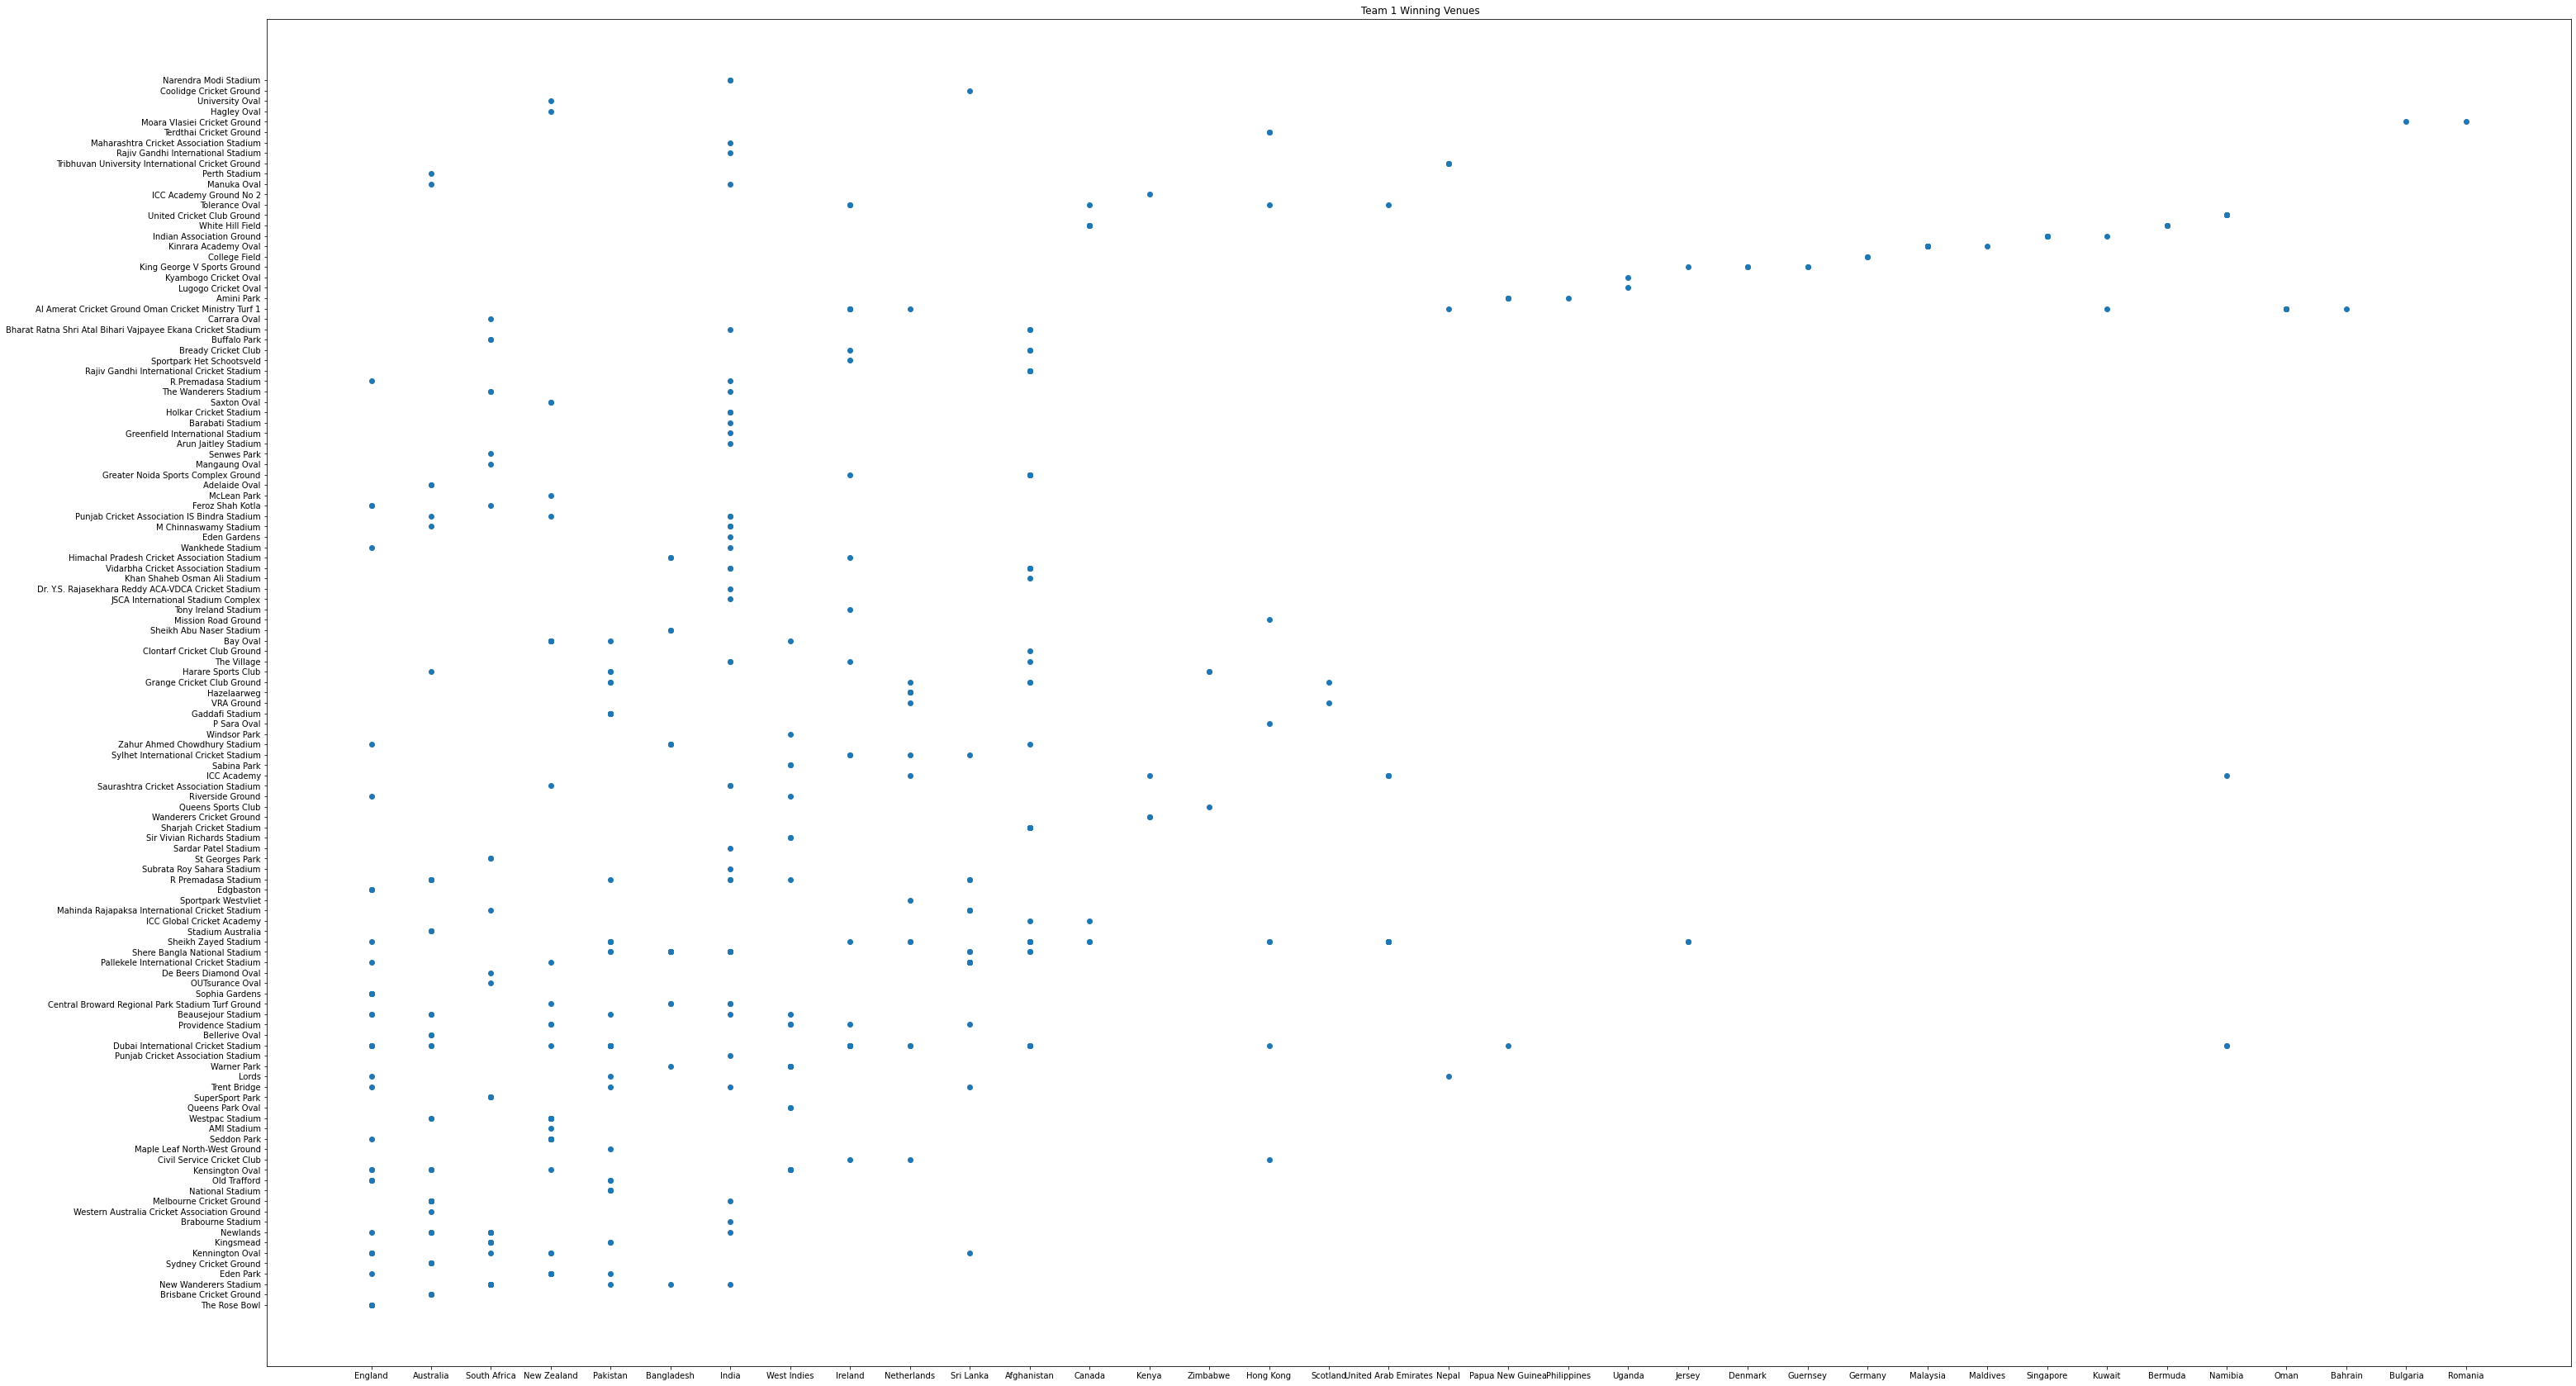

In [63]:
# team 1 winning in venues
plt.figure(figsize=(50,30))
plt.title(' Team 1 Winning Venues')
plt.scatter(venue_vs_team_one['team_1'], venue_vs_team_one['venue'])
plt.show()

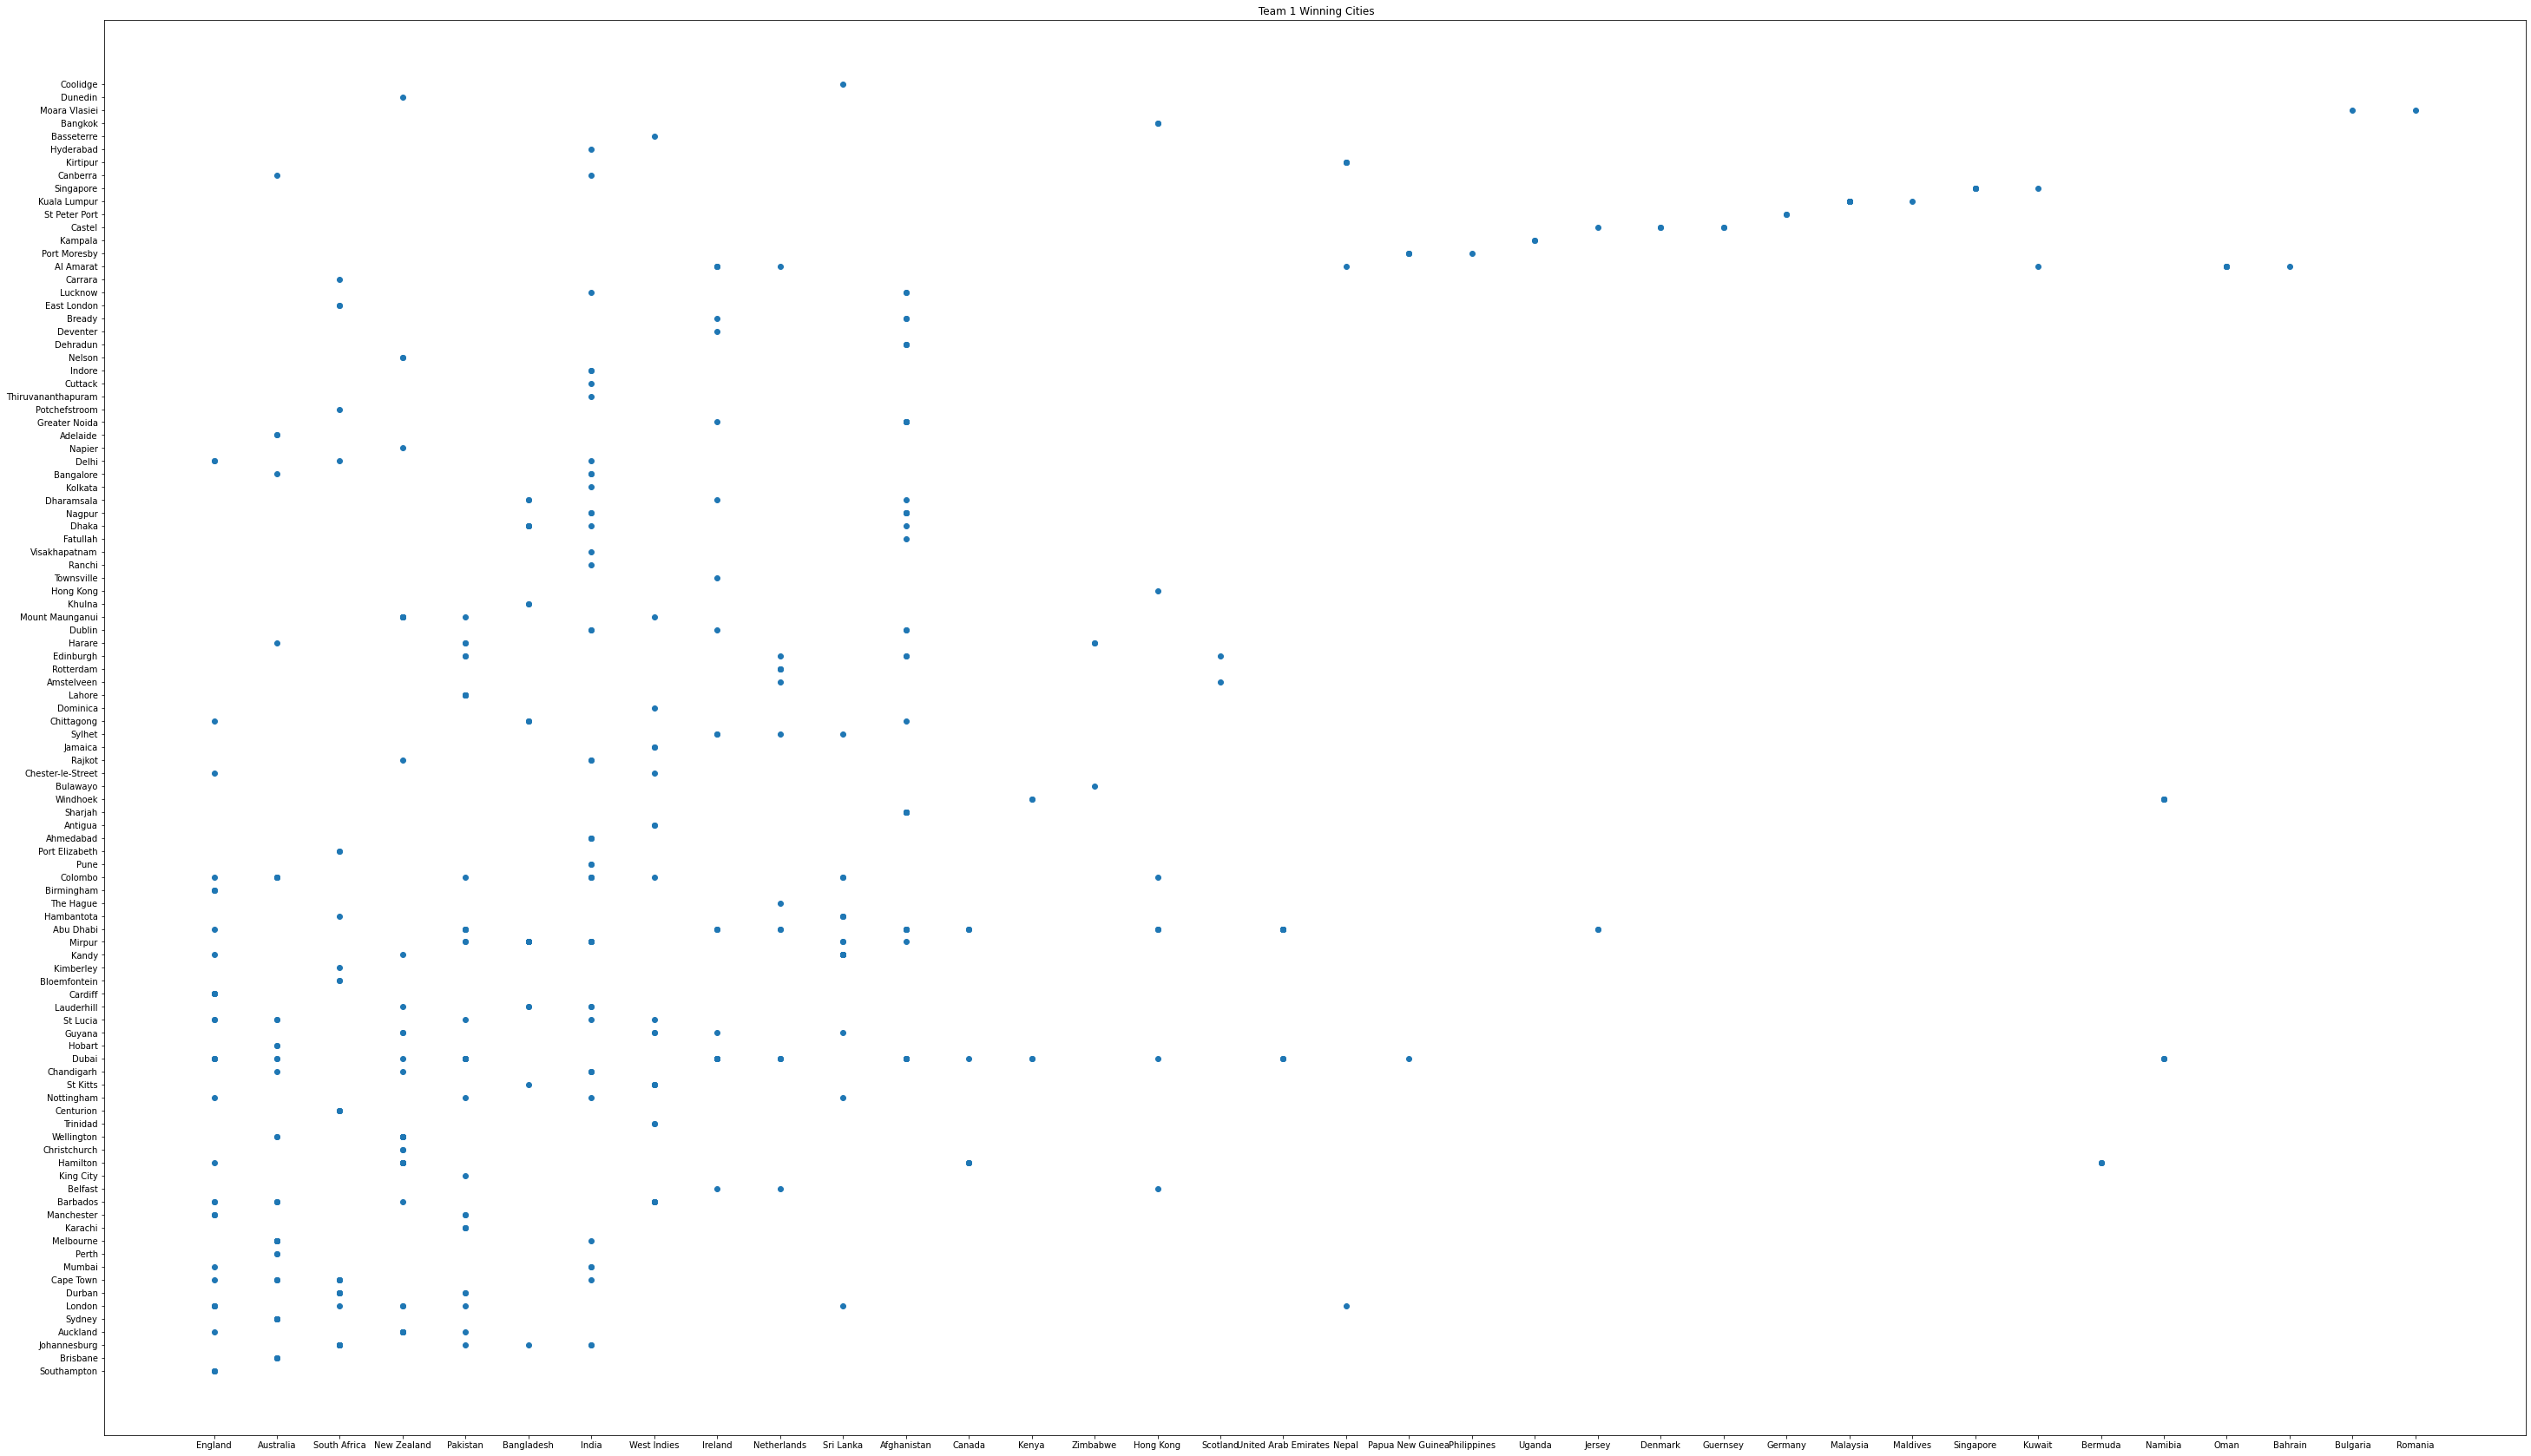

In [68]:
# team 1 winning in cities
plt.figure(figsize=(50,30))
plt.title(' Team 1 Winning Cities')
plt.scatter(venue_vs_team_one['team_1'], venue_vs_team_one['city'])
plt.show()

In [64]:
# team 2 win in cities & venues
venue_vs_team_two = match_df[match_df['team_2'] == match_df['match_winner']]
venue_vs_team_two.head()

,dates,venue,city,home_team,team_1,team_2,toss_winner,toss_decision,umpire_1,umpire_2,match_winner
0,2005-02-17,Eden Park,Auckland,New Zealand,New Zealand,Australia,Australia,bat,BF Bowden,AL Hill,Australia
2,2005-10-21,New Wanderers Stadium,Johannesburg,South Africa,South Africa,New Zealand,New Zealand,field,IL Howell,BG Jerling,New Zealand
4,2006-02-16,Eden Park,Auckland,New Zealand,West Indies,New Zealand,New Zealand,field,BF Bowden,AL Hill,New Zealand
6,2006-06-15,The Rose Bowl,Southampton,England,England,Sri Lanka,Sri Lanka,bat,IJ Gould,NJ Llong,Sri Lanka
7,2006-08-28,County Ground,Bristol,England,England,Pakistan,England,bat,PJ Hartley,NJ Llong,Pakistan


In [66]:
#team 2 and venue relationship 
team_two_venue = venue_vs_team_two.groupby('team_2')['venue'].sum()
team_two_venue.sort_values(axis=0, ascending=False, inplace=True)
team_two_venue

team_2
Nepal                       Zahur Ahmed Chowdhury StadiumZahur Ahmed Chowd...
Hong Kong                   Zahur Ahmed Chowdhury StadiumThe VillageThe Vi...
Maldives                    Tribhuvan University International Cricket Ground
Ireland                     Trent BridgeMombasa Sports Club GroundMombasa ...
Sri Lanka                   The Rose BowlWestpac StadiumNew Wanderers Stad...
Italy                                Sportpark MaarschalkerweerdCollege Field
Oman                        Sheikh Zayed StadiumSheikh Zayed StadiumKhan S...
Zimbabwe                    NewlandsQueens Park OvalSylhet International C...
India                       New Wanderers StadiumKingsmeadKingsmeadKingsme...
New Zealand                 New Wanderers StadiumEden ParkKingsmeadNew Wan...
United States of America                     National StadiumWhite Hill Field
Bermuda                              National StadiumBermuda National Stadium
Romania                                          Moara Vl

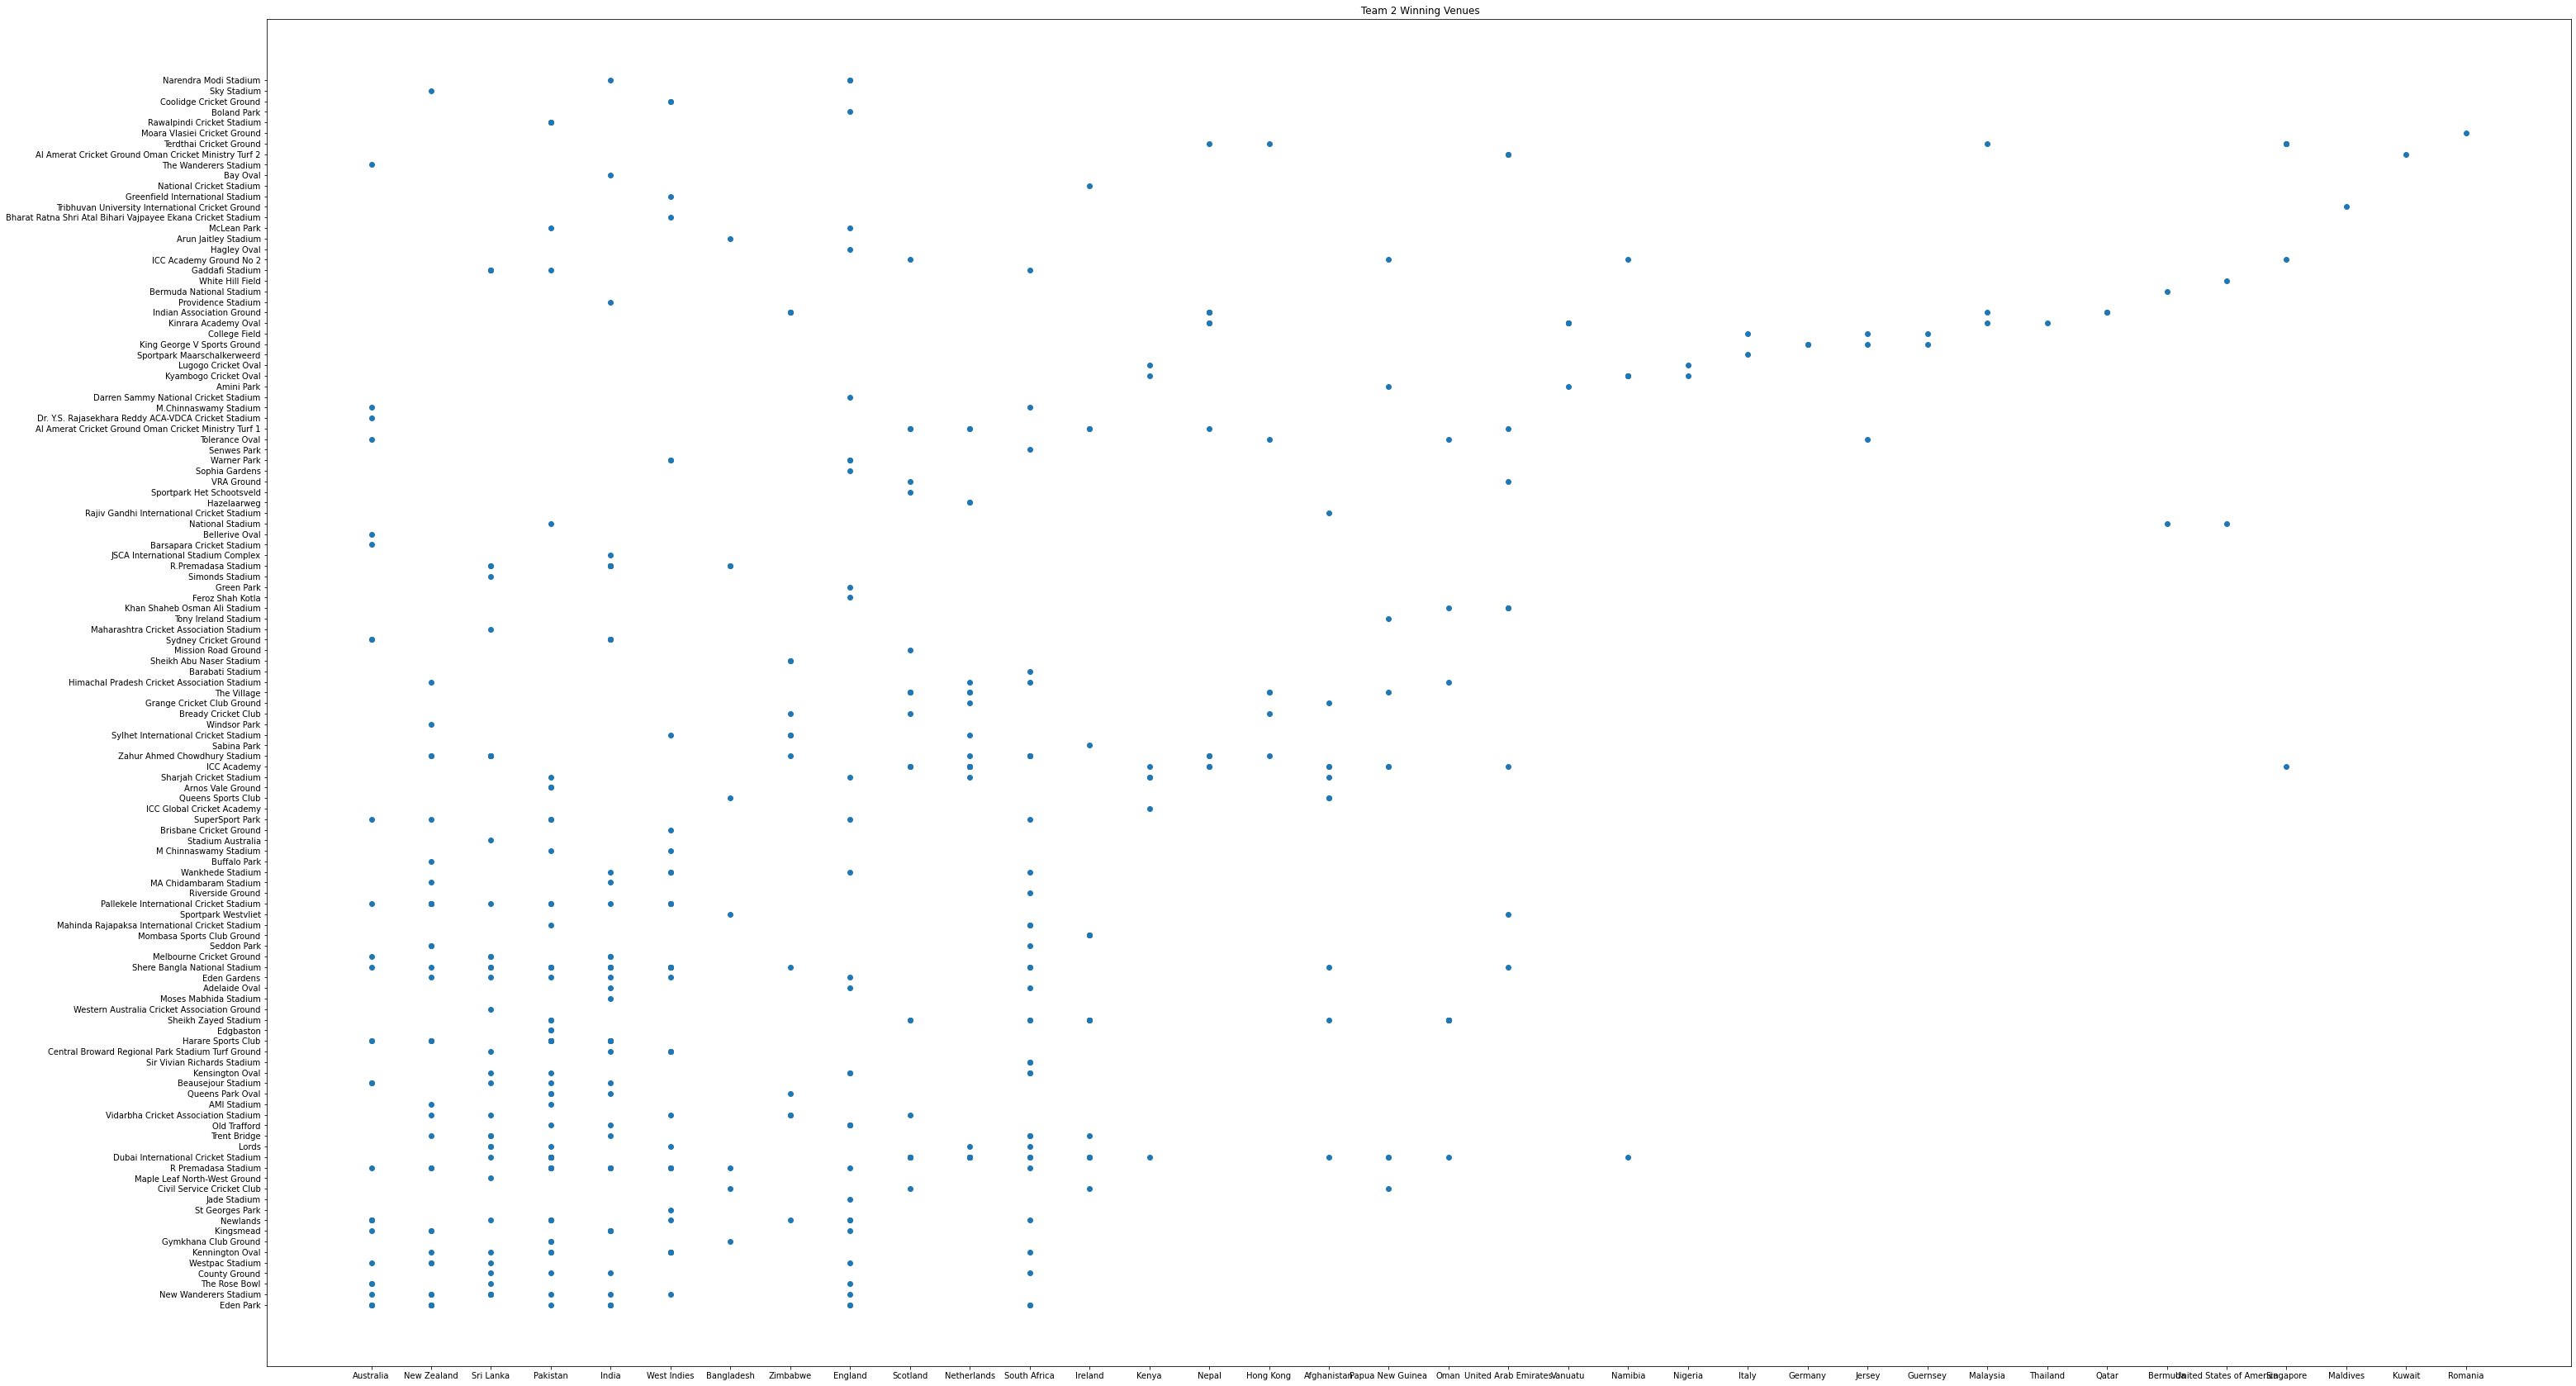

In [67]:
# team 2 winnning in venues
plt.figure(figsize=(50,30))
plt.title(' Team 2 Winning Venues')
plt.scatter(venue_vs_team_two['team_2'], venue_vs_team_two['venue'])
plt.show()

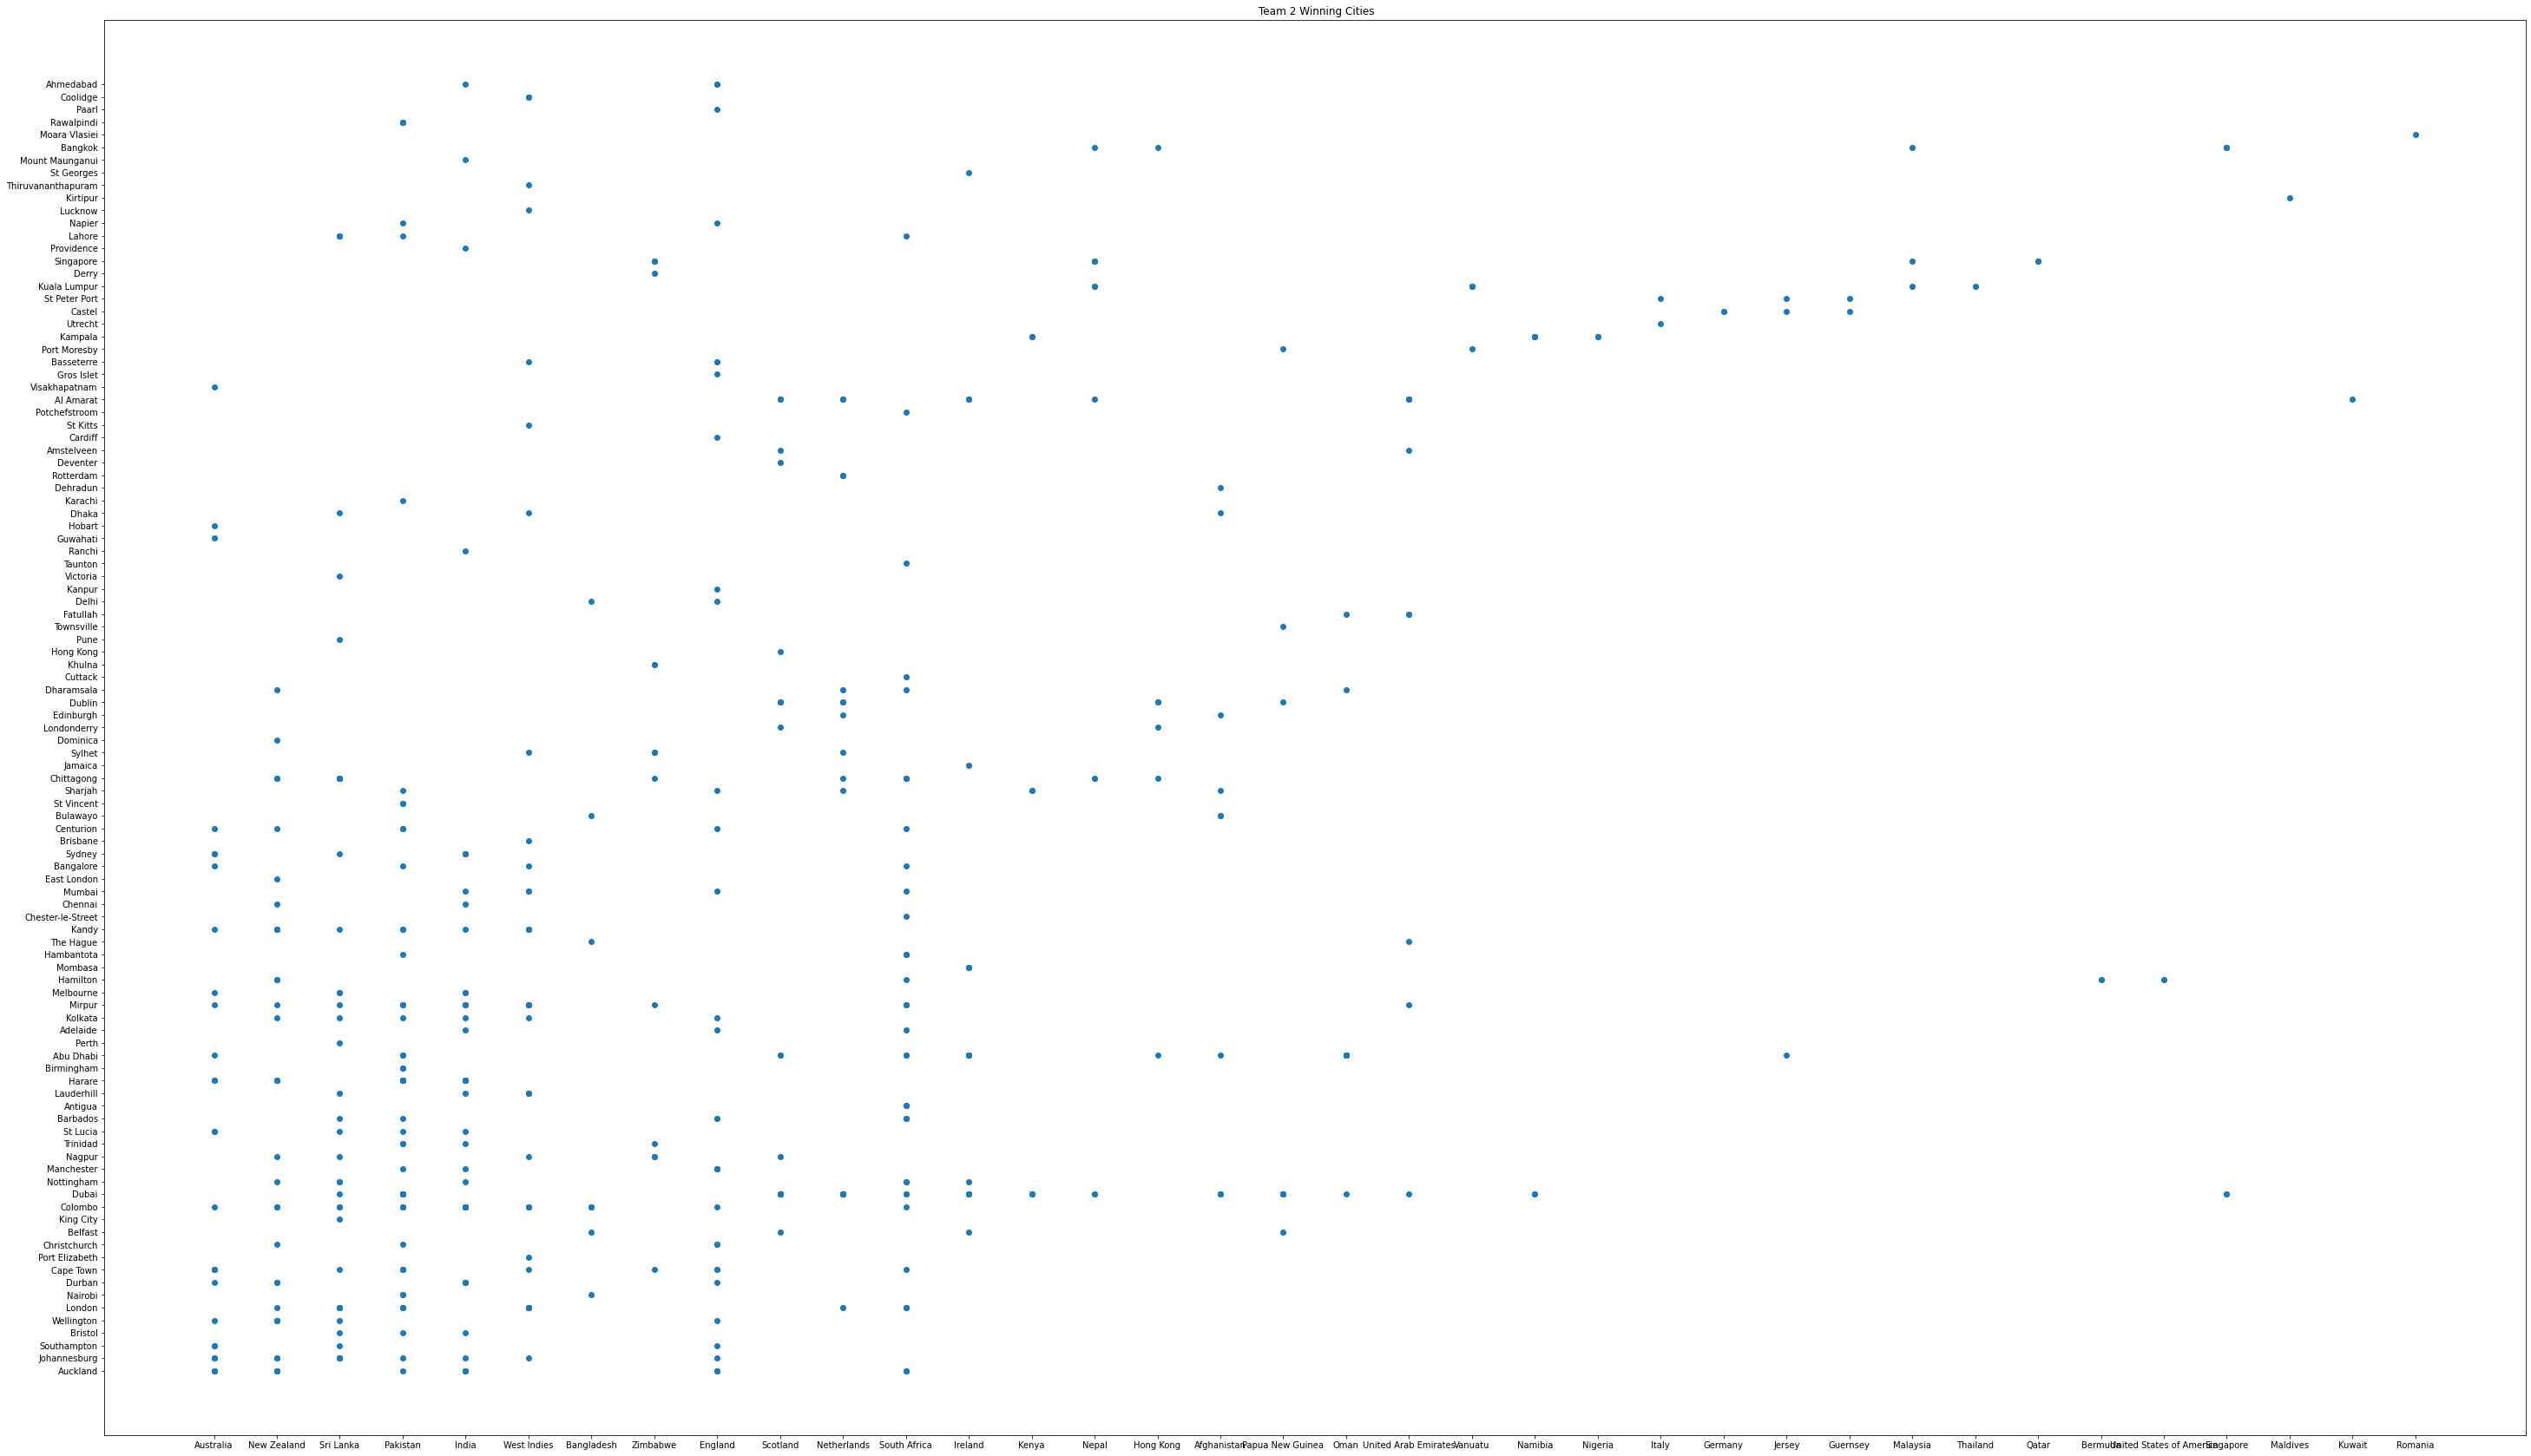

In [69]:
# team 2 winning in cities
plt.figure(figsize=(50,30))
plt.title(' Team 2 Winning Cities')
plt.scatter(venue_vs_team_two['team_2'], venue_vs_team_two['city'])
plt.show()

# Feature Selection

In [70]:
# drop dates, umpire 1 & umpire 2 from datafram
mod_match_df = match_df.drop(["dates", "umpire_1", "umpire_2" ], axis = 1)
mod_match_df.head(10)

,venue,city,home_team,team_1,team_2,toss_winner,toss_decision,match_winner
0,Eden Park,Auckland,New Zealand,New Zealand,Australia,Australia,bat,Australia
1,The Rose Bowl,Southampton,England,England,Australia,England,bat,England
2,New Wanderers Stadium,Johannesburg,South Africa,South Africa,New Zealand,New Zealand,field,New Zealand
3,Brisbane Cricket Ground,Brisbane,Australia,Australia,South Africa,Australia,bat,Australia
4,Eden Park,Auckland,New Zealand,West Indies,New Zealand,New Zealand,field,New Zealand
5,New Wanderers Stadium,Johannesburg,South Africa,South Africa,Australia,South Africa,bat,South Africa
6,The Rose Bowl,Southampton,England,England,Sri Lanka,Sri Lanka,bat,Sri Lanka
7,County Ground,Bristol,England,England,Pakistan,England,bat,Pakistan
8,New Wanderers Stadium,Johannesburg,South Africa,South Africa,India,South Africa,bat,India
9,Westpac Stadium,Wellington,New Zealand,New Zealand,Sri Lanka,New Zealand,bat,Sri Lanka


In [71]:
mod_match_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 971 entries, 0 to 970
Data columns (total 8 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   venue          971 non-null    object
 1   city           971 non-null    object
 2   home_team      971 non-null    object
 3   team_1         971 non-null    object
 4   team_2         971 non-null    object
 5   toss_winner    971 non-null    object
 6   toss_decision  971 non-null    object
 7   match_winner   971 non-null    object
dtypes: object(8)
memory usage: 60.8+ KB


### Using label encoder for Toss decision 

In [72]:
from sklearn.preprocessing import LabelEncoder

ftr_list = ['toss_decision']
encoder = LabelEncoder()
for ftr in ftr_list:
    mod_match_df[ftr] = encoder.fit_transform(mod_match_df[ftr])
    print(encoder.classes_)

mod_match_df.head(10)

['bat' 'field']


,venue,city,home_team,team_1,team_2,toss_winner,toss_decision,match_winner
0,Eden Park,Auckland,New Zealand,New Zealand,Australia,Australia,0,Australia
1,The Rose Bowl,Southampton,England,England,Australia,England,0,England
2,New Wanderers Stadium,Johannesburg,South Africa,South Africa,New Zealand,New Zealand,1,New Zealand
3,Brisbane Cricket Ground,Brisbane,Australia,Australia,South Africa,Australia,0,Australia
4,Eden Park,Auckland,New Zealand,West Indies,New Zealand,New Zealand,1,New Zealand
5,New Wanderers Stadium,Johannesburg,South Africa,South Africa,Australia,South Africa,0,South Africa
6,The Rose Bowl,Southampton,England,England,Sri Lanka,Sri Lanka,0,Sri Lanka
7,County Ground,Bristol,England,England,Pakistan,England,0,Pakistan
8,New Wanderers Stadium,Johannesburg,South Africa,South Africa,India,South Africa,0,India
9,Westpac Stadium,Wellington,New Zealand,New Zealand,Sri Lanka,New Zealand,0,Sri Lanka


In [73]:
# total occurance of each venues
mod_match_df['venue'].value_counts(sort=True)

Dubai International Cricket Stadium    62
Sheikh Zayed Stadium                   44
Shere Bangla National Stadium          44
R Premadasa Stadium                    26
New Wanderers Stadium                  24
                                       ..
Carrara Oval                            1
Brabourne Stadium                       1
Rajiv Gandhi International Stadium      1
Jade Stadium                            1
Subrata Roy Sahara Stadium              1
Name: venue, Length: 138, dtype: int64

In [74]:
# total occurance of each cities
mod_match_df['city'].value_counts(sort=True)

Dubai           92
Abu Dhabi       53
Colombo         37
Mirpur          35
Johannesburg    28
                ..
Victoria         1
St Georges       1
Paarl            1
Kimberley        1
Taunton          1
Name: city, Length: 117, dtype: int64